# GPU Check

In [ ]:
import tensorflow as tf
import time

# Check if a GPU is available
print("Available device:", tf.config.list_physical_devices('GPU'))

# Perform an intensive operation
start = time.time()
a = tf.random.normal([10000, 10000])
b = tf.matmul(a, a)
print("GPU computation time:", time.time() - start)

Available device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU computation time: 0.9954686164855957


#Import Libraries

In [ ]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
# Import the device_lib module from TensorFlow to check available hardware devices
from tensorflow.python.client import device_lib
# List and print all available devices (CPU, GPU, etc.) on the system
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7365057214520104141
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5389653363908231144
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


#Set the Directory

In [ ]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive
# Mount Google Drive to the specified directory in Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys  # Import the sys module to access system-specific parameters and functions
# Add a specific directory to the system path
sys.path.append('/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/moving around')

In [ ]:
# Define the path to the new directory
new_directory = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/moving around'
# Check if the specified directory exists
if os.path.exists(new_directory):
    os.chdir(new_directory) # If the directory exists, change the current working directory to the new directory
    print("Current Dir:", os.getcwd())  # Print the current working directory to confirm the change
else:
    print("Non existing dir:", new_directory) # If the directory does not exist, print a message

Current Dir: /content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/moving around


In [ ]:
# Define the path to the training dataset directory
train_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/moving around/asl_alphabet_train'
# Define the path to the test dataset directory
test_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/moving around/asl_alphabet_test'

# Load Images and Reshaping

In [ ]:
# List of class labels corresponding to subdirectories
classes = ['D', 'H', 'K', 'S', 'X']

def get_data(data_dir):
    """
    Loads images from a given directory, resizes them, and assigns labels based on subdirectory names.

    Parameters:
    data_dir (str): Path to the dataset directory containing subdirectories for each class.

    Returns:
    images (list): List of resized images as NumPy arrays.
    labels (list): List of integer labels corresponding to image classes.
    """
    images = []
    labels = []
    # List all subdirectories in the dataset directory
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        sub_dir = os.path.join(data_dir, dir_list[i])
        # Check if the current item is a directory
        if os.path.isdir(sub_dir):
            for image in os.listdir(sub_dir):
                img_path = os.path.join(sub_dir, image)
                # Read the image using OpenCV
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize the image to 64x64 pixels
                    img = cv2.resize(img, (64, 64))
                    # Ensure the image has the correct shape (64, 64, 3) for color images
                    img = np.reshape(img, (64, 64, 3))
                    # Append the processed image to the list
                    images.append(img)
                    # Assign a numerical label based on the class name
                    class_index = classes.index(dir_list[i])
                    labels.append(class_index)
    return images, labels



# Load images and labels
X, y = get_data(train_dir)

# Print the number of loaded images and unique labels
print(f"Loaded {len(X)} images with {len(set(y))} unique labels.")

Obtaining images of S ...
Obtaining images of D ...
Obtaining images of H ...
Obtaining images of X ...
Obtaining images of K ...
Caricate 4339 immagini con 5 etichette uniche.


In [ ]:
# print Pictures and Labels
print("Number of Images:", len(X))
print("Number of Labels:", len(y))

Number of Images: 4339
Number of Labels: 4339


# Data Visualization

In [ ]:
# List of classes in the ASL (American Sign Language) alphabet
classes = ['D', 'H', 'K','X', 'S']

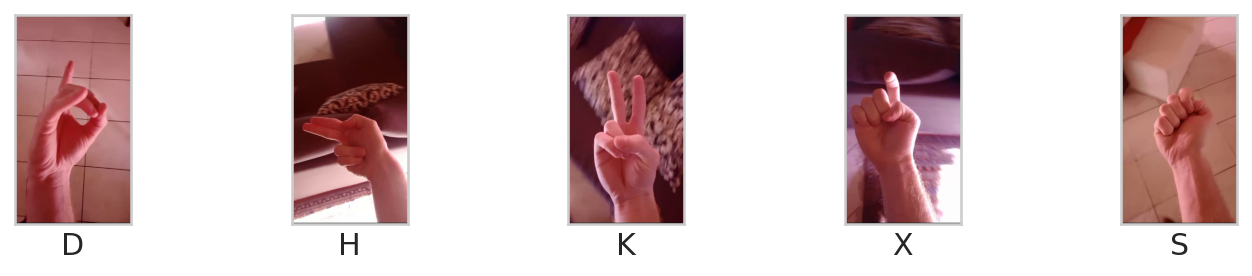

In [ ]:
def plot_sample_images():
    # Create a figure with a fixed size to display 5 images properly
    plt.figure(figsize=(10, 2))
    # Loop through the first 5 class labels
    for i in range(5):
        plt.subplot(1, 5, i + 1)  # Create a 1-row, 5-column grid of subplots
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        # Construct the file path for a sample image from each class
        path = os.path.join(train_dir, classes[i], f"{classes[i]}_1.png")
        # Load and display the image
        img = plt.imread(path)
        plt.imshow(img)
        # Label the image with its corresponding class
        plt.xlabel(classes[i])
    # Adjust layout for better spacing
    plt.tight_layout()
    # Show the figure
    plt.show()

# Call the function to display sample images
plot_sample_images()

# Data Preprocessing: Normalization and One-Hot Encoding

In [ ]:
def preprocess_data(X, y):
    # Convert the list of images to a NumPy array
    np_X = np.array(X)
    # Normalize pixel values to the range [0,1] by dividing by 255
    normalised_X = np_X.astype('float32') / 255
    # Convert class labels into one-hot encoded vectors
    label_encoded_y = utils.to_categorical(y)
    # Split the dataset into training (90%) and testing (10%) sets
    x_train, x_test, y_train, y_test = train_test_split(
        normalised_X, label_encoded_y, test_size=0.1
    )

    return x_train, x_test, y_train, y_test

# Call the function to preprocess the data
x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [ ]:
# Print the shapes of the training and test data
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (3905, 64, 64, 3)
Test data: (434, 64, 64, 3)


# Train CNN - we tried with many formats, but the one shown is 64 x 64 pixels


In [ ]:
classes = 5 #total number of letters and symbols
batch = 32 #batch's dimension
epochs = 30 #number of epochs
learning_rate = 0.0001 #rate of learning

In [ ]:
adam = Adam(learning_rate) #Use the Adam optimizer to update the model's weights during training.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback to stop training early if validation loss does not improve for 5 consecutive epochs
# This helps prevent overfitting by restoring the best model weights
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs to wait before stopping
    restore_best_weights=True,  # Restore the best model weights when stopping
    verbose=1  # Print a message when training stops
)

# Callback to reduce the learning rate when validation loss stagnates
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce the learning rate by a factor of 0.5
    patience=5,  # Wait for 5 epochs before reducing the learning rate
    min_lr=1e-6  # Set a lower bound for the learning rate
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()  # Create a sequential model, which is a linear stack of layers

# Add the input layer as the first layer
model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Conv2D(64, (3, 3)): Adds a convolutional layer with 64 filters of size 3x3.
# padding='same': Keeps the output size the same as the input size.
# activation='relu': Uses the ReLU (Rectified Linear Unit) activation function.
model.add(AveragePooling2D(pool_size=(2, 2)))  # Reduces the spatial dimensions of the output (downsampling) by taking the maximum value in each 2x2 window.
model.add(BatchNormalization())  # Normalizes the output of the previous layer to improve training stability and speed.

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Conv2D(128, (3, 3)): Adds a convolutional layer with 128 filters of size 3x3.
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout(0.4): Randomly disables 40% of the neurons during training to prevent overfitting.

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# Conv2D(256, (3, 3)): Adds a convolutional layer with 256 filters of size 3x3.
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())  # Flatten(): Converts the 3D output of the convolutional layers into a 1D vector for input into the fully connected layers.
model.add(Dropout(0.4))  # A higher dropout rate reduces overfitting
model.add(Dense(1024, activation='relu'))
# Dense(1024): Adds a dense layer with 1024 neurons.
# activation='relu': Uses the ReLU activation function.
model.add(Dense(classes, activation='softmax'))
# Dense(classes): Adds a dense layer with a number of neurons equal to the number of classes.
# activation='softmax': Uses the softmax activation function to produce a probability distribution across the classes.

#Network architecture

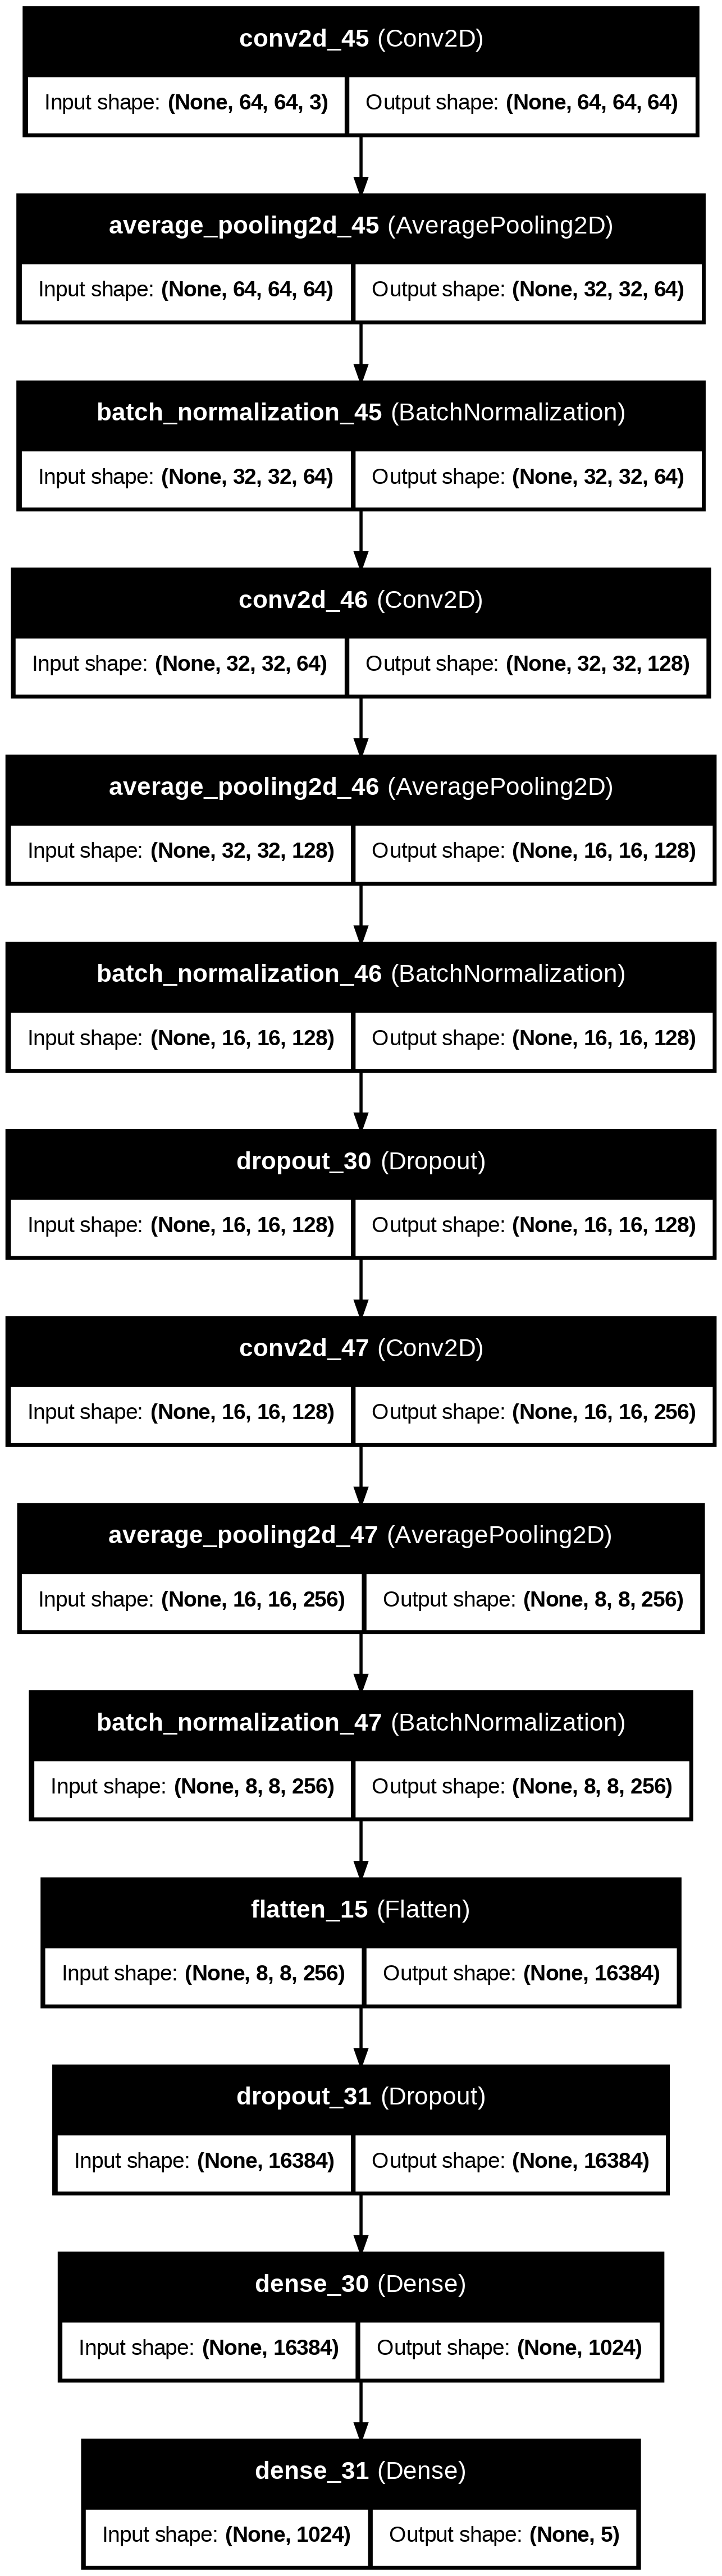

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image in the current directory
# The image will show the layers of the model and their shapes.
plot_model(model, to_file='model_V1.png', show_shapes=True, show_layer_names=True)
# to_file='model_V1.png': Specifies the file name and location where the model architecture will be saved as an image.
# show_shapes=True: Displays the shape of the data passing through each layer in the model architecture image.
# show_layer_names=True: Displays the name of each layer in the model architecture image.

# Model Compile

> Add blockquote




In [ ]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Use the Adam optimizer to update the model's weights during training.
# The Adam optimizer is an adaptive learning rate optimization algorithm that is widely used in deep learning for faster convergence.

# loss='categorical_crossentropy': Specifies the loss function to use.
# 'categorical_crossentropy' is commonly used for multi-class classification problems, where the target labels are one-hot encoded.
# This function calculates the difference between the predicted probability distribution and the actual labels, and the goal is to minimize this difference during training.

# metrics=['accuracy']: Specifies that accuracy will be used as the metric to evaluate the model's performance.
# During training and evaluation, the model's accuracy (the percentage of correct predictions) will be tracked and reported.

In [ ]:
model.summary()
# The command model.summary() in Keras provides a detailed description of the model's architecture.
# It prints the following details about each layer in the model:
# Layer (type): The name and type of the layer (e.g., Conv2D, Dense).
# Output Shape: The shape of the output data after the layer processes the input. This indicates how the dimensions of the data change after the layer.
# Param #: The number of trainable parameters in each layer. These are the weights and biases that will be adjusted during training.
# Total params: The total number of parameters across all layers in the model. This includes both trainable and non-trainable parameters.
# Trainable params: The number of parameters that can be updated during training. These are the parameters the model will learn during the training process.
# Non-trainable params: The number of parameters that will not be updated during training. These are parameters that have been frozen or set to not be adjusted.

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_45                 │ (None, 32, 32, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_46                 │ (None, 16, 16, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_47                 │ (None, 8, 8, 256)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,155,973 (65.44 MB)

 Trainable params: 17,155,077 (65.44 MB)

 Non-trainable params: 896 (3.50 KB)

#Data Augumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for real-time data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,        # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,    # Shift images horizontally by up to 10% of width
    height_shift_range=0.1,   # Shift images vertically by up to 10% of height
    # brightness_range=[0.9, 1.1],  # Adjust brightness (commented out)
    zoom_range=0.05,          # Random zoom within 5% of original size
    horizontal_flip=False,    # Do not flip images horizontally
    fill_mode='nearest',      # Fill missing pixels using the nearest values
    validation_split=0.2      # Reserve 20% of data for validation
)

# Create a generator for training data with augmentation
train_generator = datagen.flow(
    x_train, y_train,        # Training images and labels
    batch_size=batch,        # Number of images per batch
    subset='training',       # Use 80% of the data for training
    shuffle=True             # Shuffle images to improve learning
)

# Create a generator for validation data (without shuffling)
val_generator = datagen.flow(
    x_train, y_train,        # Training images and labels (same dataset, different split)
    batch_size=batch,        # Number of images per batch
    subset='validation'      # Use 20% of the data for validation
)

Esempio di valori del batch (prima e dopo augmentation):
Originale (prima):  0.0 255.0
Augmentata (dopo):  0 255


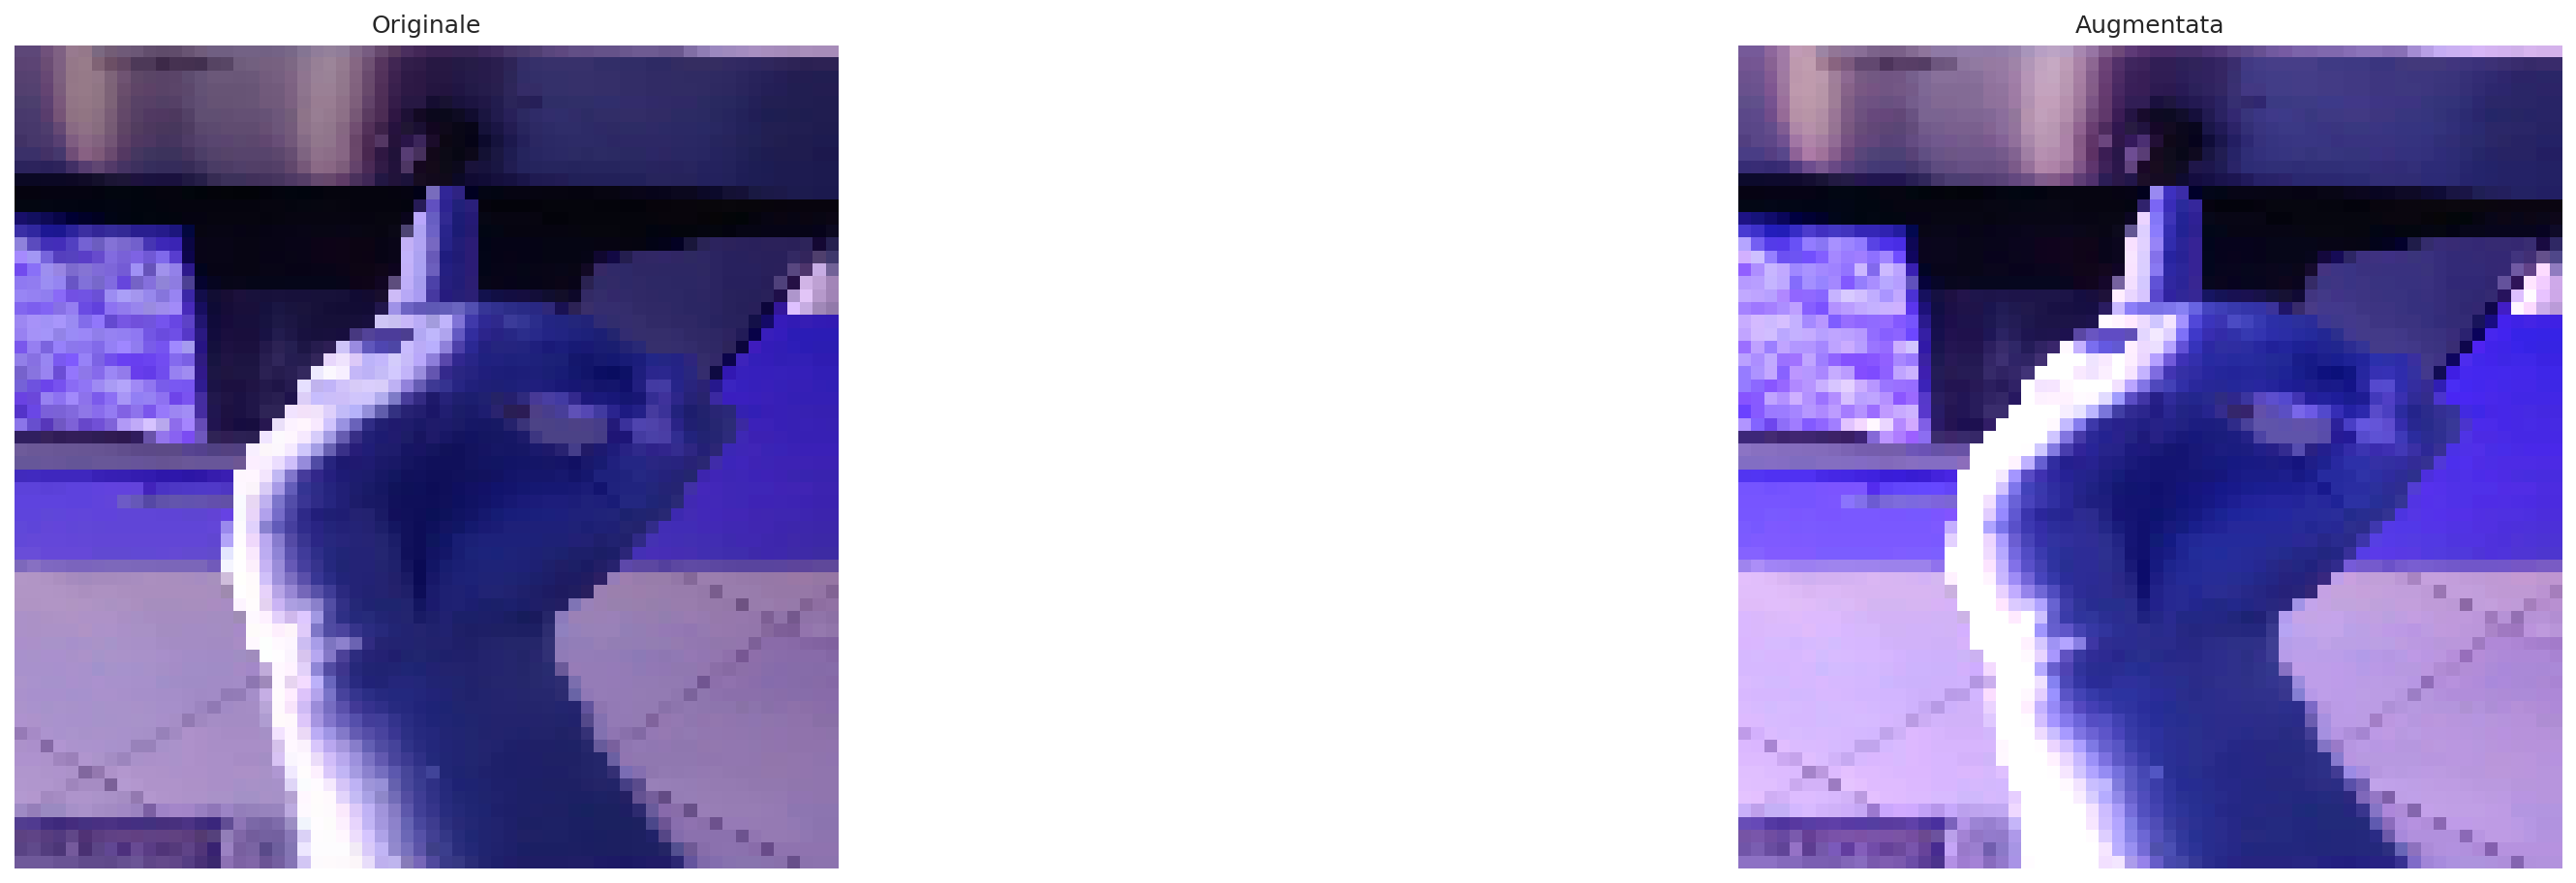

In [ ]:
# Denormalization: convert pixel values back to the 0-255 range
x_train_denormalized = x_train * 255

# Create a data generator with a brightness range to test augmentation effects
datagen = ImageDataGenerator(brightness_range=[0.7, 1.3])  # Adjust brightness between 70% and 130%

# Select a single image from the dataset for testing augmentation
image = x_train_denormalized[0:1]  # Take only the first image

# Generate an augmented version of the image
augmented_image = next(datagen.flow(image, batch_size=1))

# Denormalize the augmented image for proper visualization
augmented_image_denormalized = np.clip(augmented_image, 0, 255)  # Ensure pixel values remain in valid range
augmented_image_denormalized = augmented_image_denormalized.astype(np.uint8)  # Convert to integer format

# Display min/max values before and after augmentation
print("Batch values example (before and after augmentation):")
print("Original (before): ", np.min(image), np.max(image))  # Pixel range before augmentation
print("Augmented (after): ", np.min(augmented_image_denormalized), np.max(augmented_image_denormalized))  # After augmentation

# Plot original vs. augmented image for comparison
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image[0].astype(np.uint8))  # Display original image
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Augmented")
plt.imshow(augmented_image_denormalized[0])  # Display augmented image
plt.axis('off')

plt.show()

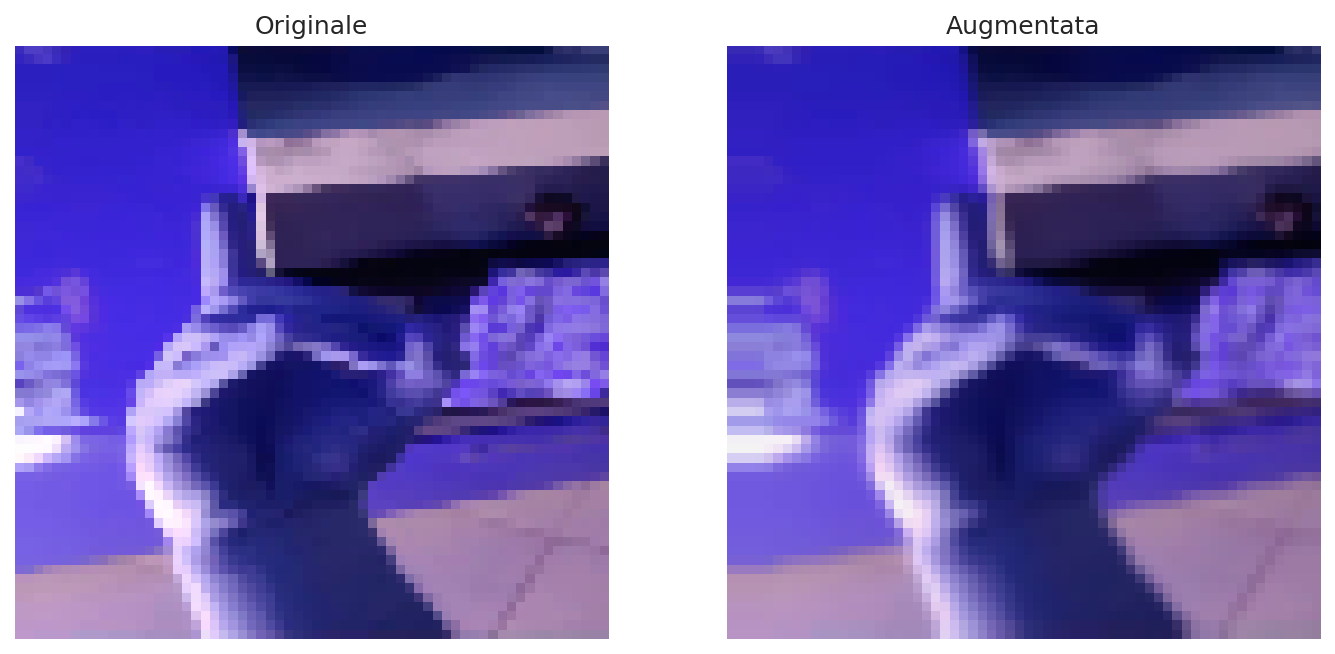

In [ ]:
# Denormalize the x_train data by converting pixel values back to the 0-255 range
x_train_denormalized = x_train * 255.0

# Create a data generator for applying random transformations to images
datagen = ImageDataGenerator(
    rotation_range=10,        # Apply random rotations up to ±10 degrees
    width_shift_range=0.05,   # Shift images horizontally by up to 5% of their width
    height_shift_range=0.05,  # Shift images vertically by up to 5% of their height
    brightness_range=[0.9, 1.1],  # Adjust brightness randomly within ±10% of the original value
    zoom_range=0.05,          # Apply random zooming up to ±5% of the original size
    horizontal_flip=False,    # Do not apply horizontal flipping
    fill_mode='nearest'       # Fill missing pixels using the nearest pixel values
)

# Select a random image from the dataset for augmentation testing
random_index = np.random.randint(0, len(x_train_denormalized))  # Generate a random index
original_image = x_train_denormalized[random_index]  # Extract the corresponding image

# Expand dimensions to make the image compatible with the generator input format
original_image_expanded = np.expand_dims(original_image, axis=0)  # Shape becomes (1, height, width, channels)

# Generate an augmented version of the selected image
augmented_image = next(datagen.flow(original_image_expanded, batch_size=1))[0]  # Extract the generated image

# Create a figure to compare the original and augmented images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, position 1)
plt.title("Original")  # Set the title
plt.imshow(original_image.astype(np.uint8), cmap='gray')  # Convert to uint8 and display
plt.axis('off')  # Remove axis ticks

# Display the augmented image
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, position 2)
plt.title("Augmented")  # Set the title
plt.imshow(augmented_image.astype(np.uint8), cmap='gray')  # Convert to uint8 and display
plt.axis('off')  # Remove axis ticks

# Show the final comparison
plt.show()

#Train the Classifier

In [ ]:
# Train the model using the training data
history = model.fit(
    x_train, y_train,        # Training images and labels
    batch_size=batch,        # Number of samples per training batch
    epochs=epochs,           # Total number of training iterations over the dataset
    validation_split=0.2,    # Use 20% of training data for validation
    shuffle=True,            # Shuffle data before each epoch to improve learning
    verbose=1                # Print detailed training progress information
)

# Alternative approach using a data generator (commented out)
# history = model.fit(
#     train_generator,       # Use an augmented data generator instead of raw data
#     epochs=30,            # Train for 30 epochs
#     validation_split=0.2,  # Use 20% of the data for validation
#     verbose=1             # Print training details
# )

# Explanation of parameters:
# - validation_split: Reserves 20% of training data for validation to monitor performance.
# - shuffle: Ensures data is randomly shuffled before each epoch to prevent the model from memorizing the order.
# - verbose: Controls the level of output during training (1 = detailed output per epoch).

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9818 - loss: 0.0756 - val_accuracy: 0.9834 - val_loss: 0.0661
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9884 - loss: 0.0447 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9968 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9978 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9991 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9982 - loss: 0.0110 - val_accuracy: 0.9949 - val_loss: 0.0178
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9992 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9999 - loss: 0.0052 - val_accuracy: 1.0000 - v

In [ ]:
# Print the minimum and maximum pixel values of the first image in the training dataset
# This helps to verify the range of pixel values (should typically be between 0 and 1 if normalized)
print(np.min(x_train[0]), np.max(x_train[0]))  # Outputs the min and max pixel values of the first image in the training set

0.0 1.0


In [ ]:
# Train the model using a data generator with data augmentation
history = model.fit(
    train_generator,         # Train using the data generated by the train_generator (with data augmentation)
    validation_data=val_generator,  # Use the validation data generated by the val_generator
    epochs=epochs,           # Total number of training epochs
    callbacks=[early_stop],  # Apply the early stopping callback to prevent overfitting
    verbose=1                # Print detailed information about training progress for each epoch
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 206ms/step - accuracy: 0.5217 - loss: 1.5868 - val_accuracy: 0.2087 - val_loss: 1.7643
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8480 - loss: 0.4668 - val_accuracy: 0.2714 - val_loss: 1.8007
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9097 - loss: 0.2632 - val_accuracy: 0.4469 - val_loss: 1.4639
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.9375 - loss: 0.1793 - val_accuracy: 0.5455 - val_loss: 1.4217
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9542 - loss: 0.1357 - val_accuracy: 0.7503 - val_loss: 0.7296
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9571 - loss: 0.1420 - val_accuracy: 0.8809 - val_loss: 0.3217
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9743 - loss: 0.0766 - val_accuracy: 0.9590 - val_loss: 0.1178
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.9769 - loss: 0.0716 - val_accuracy: 0.9770 - val_lo

# Evaluation Model

In [ ]:
# Evaluate the model's performance on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)  # Evaluate model on the test dataset
print('Test Accuracy:', test_acc)  # Print the test accuracy
print('Test loss', test_loss)  # Print the test loss

# Evaluate the model's performance on the training data (without printing verbose output)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)  # Evaluate model on the training dataset
print(f"Training Accuracy: {train_acc:.4f}")  # Print the training accuracy, formatted to 4 decimal places
print(f"Training Loss: {train_loss:.4f}")  # Print the training loss, formatted to 4 decimal places

# Evaluate the model's performance again on the test data (without printing verbose output)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)  # Evaluate model on the test dataset without verbose output
print(f"Test Accuracy: {test_acc:.4f}")  # Print the test accuracy, formatted to 4 decimal places
print(f"Test Loss: {test_loss:.4f}")  # Print the test loss, formatted to 4 decimal places

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.0200
Test Accuracy: 0.9930875301361084
Test loss 0.036628518253564835
Training Accuracy: 0.9990
Training Loss: 0.0050
Test Accuracy: 0.9931
Test Loss: 0.0366


#Graphical Review

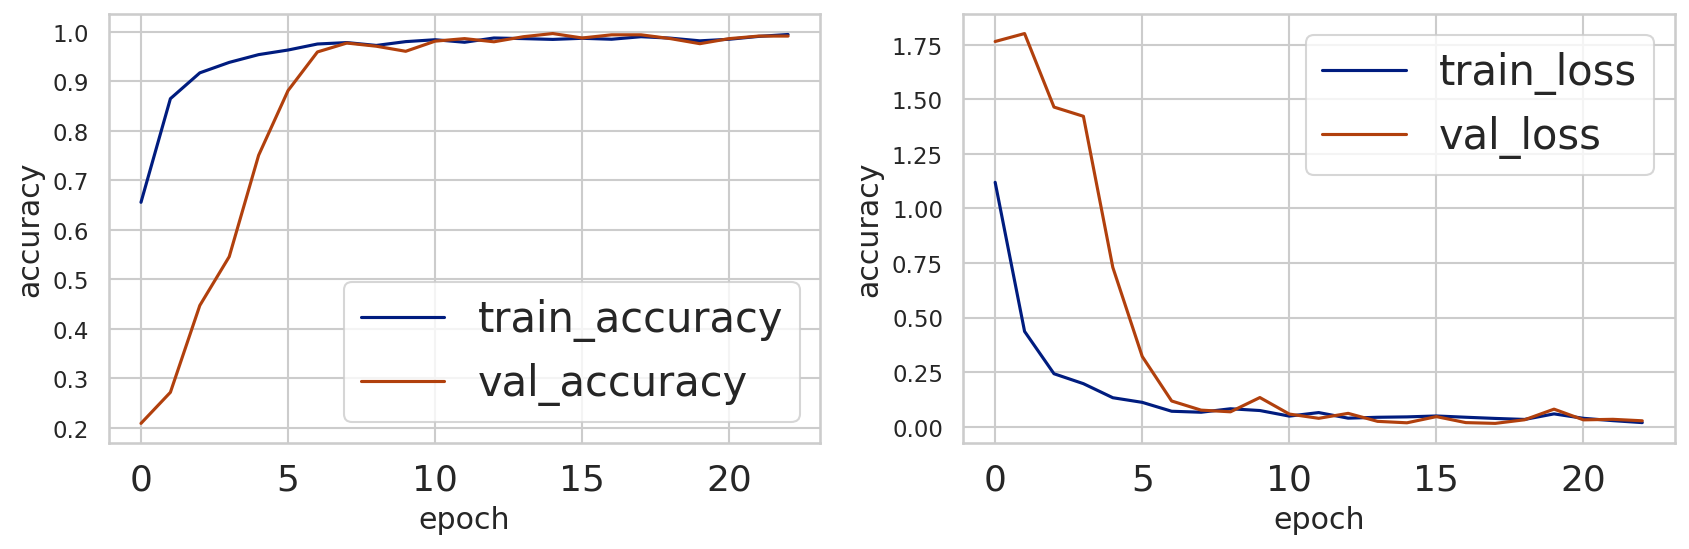

In [ ]:
def plot_results(model):
    # Create a figure with a specific size to fit multiple plots
    plt.figure(figsize=(12, 12))

    # Subplot for accuracy during training and validation
    plt.subplot(3, 2, 1)  # 3 rows, 2 columns, position 1
    plt.plot(history.history['accuracy'], label='train_accuracy')  # Plot training accuracy
    plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Plot validation accuracy
    plt.xlabel('epoch')  # Label for the x-axis (epochs)
    plt.ylabel('accuracy')  # Label for the y-axis (accuracy)
    plt.legend()  # Display legend for the two lines

    # Subplot for loss during training and validation
    plt.subplot(3, 2, 2)  # 3 rows, 2 columns, position 2
    plt.plot(history.history['loss'], label='train_loss')  # Plot training loss
    plt.plot(history.history['val_loss'], label='val_loss')  # Plot validation loss
    plt.xlabel('epoch')  # Label for the x-axis (epochs)
    plt.ylabel('loss')  # Label for the y-axis (loss)
    plt.legend()  # Display legend for the two lines

    # Show the plots
    plt.show()

# Call the function to plot the results
plot_results(model)

#Saving the Model

In [ ]:
model.save('asl_model_V2.keras') # Saves the entire Keras model (architecture, weights, and training state) to a .keras file.

In [ ]:
np.save('x_train_V2.npy', x_train)  # Save the training images (features) to a file
np.save('y_train_V2.npy', y_train)  # Save the training labels to a file
np.save('x_test_V2.npy', x_test)    # Save the testing images (features) to a file
np.save('y_test_V2.npy', y_test)    # Save the testing labels to a file

In [ ]:
import numpy as np
import tensorflow as tf

# Save the trained model to a .keras file
# This allows you to reload the model later for inference or further training
model.save('asl_model_V2.keras')  # Save the model in Keras' .keras format

# Save the training and testing data arrays in a compressed .npz file
# This includes both the features (images) and labels for both training and testing datasets
np.savez('dataset_V2.npz', x_train=x_train_denormalized, y_train=y_train, x_test=x_test_denormalized, y_test=y_test)

# Print a success message indicating that both the model and data have been saved
print("Model and data saved successfully!")

Modello e dati salvati con successo!


# Load the Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model from the .keras file
# This allows you to reuse the trained model for inference or further training without retraining it
model = load_model('asl_model_V2.keras')  # Load the model from the file 'asl_model_V2.keras'

In [ ]:
import numpy as np

# Load the saved .npy files containing the training and testing data
x_test = np.load('x_test_V2.npy')  # Load the test images
y_test = np.load('y_test_V2.npy')  # Load the test labels
x_train = np.load('x_train_V2.npy')  # Load the training images
y_train = np.load('y_train_V2.npy')  # Load the training labels

# Verify the loading of data by printing the shapes and pixel range
print(f"x_test shape: {x_test.shape}")  # Print the shape of the test images
print(f"y_test shape: {y_test.shape}")  # Print the shape of the test labels
print(f"x_train shape: {x_train.shape}")  # Print the shape of the training images
print(f"y_train shape: {y_train.shape}")  # Print the shape of the training labels
print(f"Pixel range: Min {x_test.min()}, Max {x_test.max()}")  # Print the min and max pixel values in the test set

x_test shape: (434, 64, 64, 3)
y_test shape: (434, 5)
x_train shape: (3905, 64, 64, 3)
y_train shape: (3905, 5)
Pixel range: Min 0.0, Max 1.0


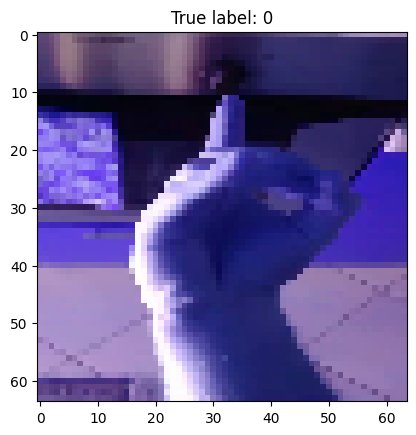

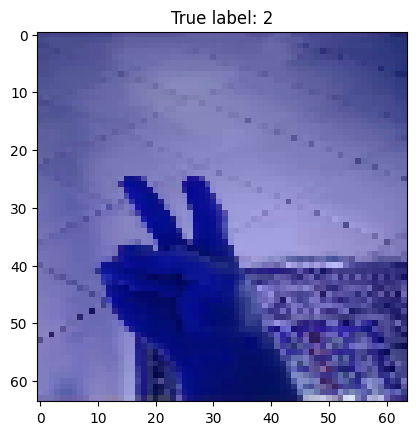

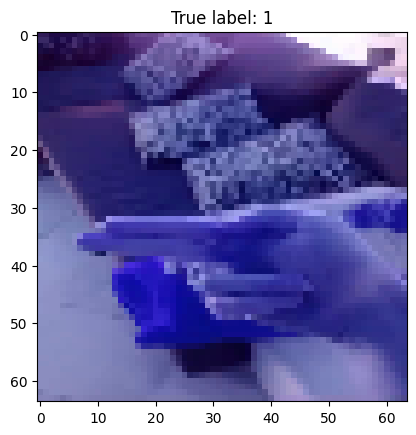

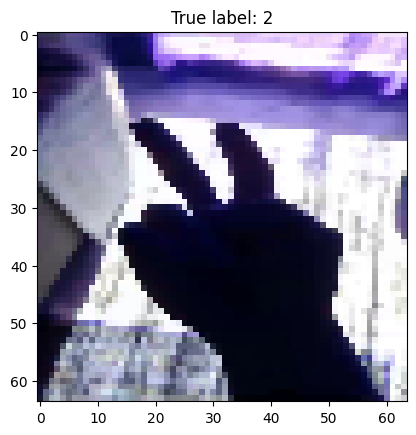

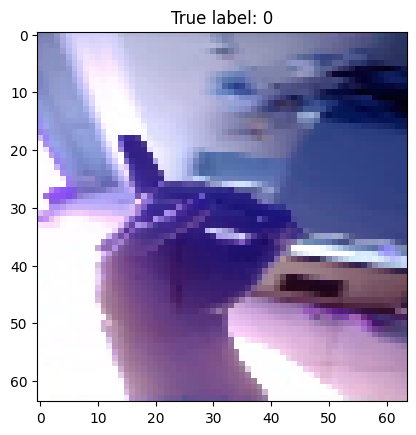

In [ ]:
# Load the training and testing data from the saved .npy files
x_train = np.load('x_train_V2.npy')  # Load the training images (features)
y_train = np.load('y_train_V2.npy')  # Load the training labels
x_test = np.load('x_test_V2.npy')    # Load the test images (features)
y_test = np.load('y_test_V2.npy')    # Load the test labels

# Create variables for displaying the images
x_train_pict = x_train  # You can normalize the images by dividing by 255 if needed (currently commented out)
x_test_pict = x_test    # Same here, you can normalize the test images if required

# Loop through the first 5 training images
for i in range(5):
    plt.imshow(x_train_pict[i], cmap='gray')  # Display the image (using gray color map for grayscale images)
    plt.title(f'True label: {np.argmax(y_train[i])}')  # Display the true label for the image (one-hot encoded to class index)
    plt.show()  # Show the image and label

# Predictions

In [ ]:
# Select the 5th image (index 4) from the test set
# Reshape the image to match the input shape expected by the model (batch size of 1, height 64, width 64, 3 channels for RGB)
single_image = x_test[4].reshape(1, 64, 64, 3)

# Make a prediction for the selected image using the trained model
# The model outputs probabilities for each class, and np.argmax will give the index of the highest probability
prediction = model.predict(single_image)

# Print the predicted class (the class with the highest probability)
print(f"Predicted class: {np.argmax(prediction)}")

# Print the probability associated with the predicted class
print(f"Probability: {np.max(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted class: 0
Probability: 1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


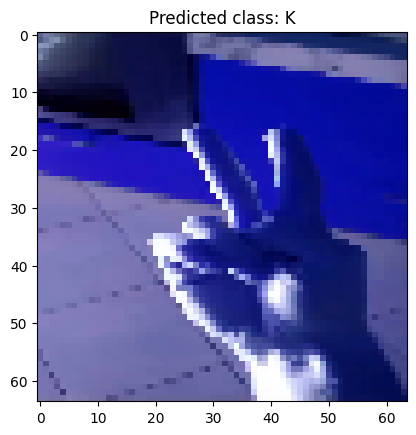

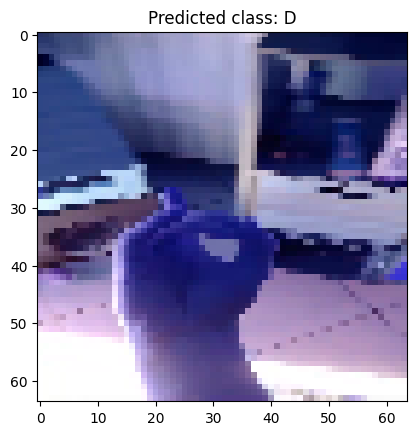

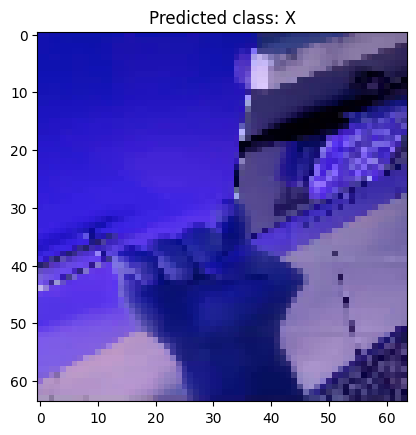

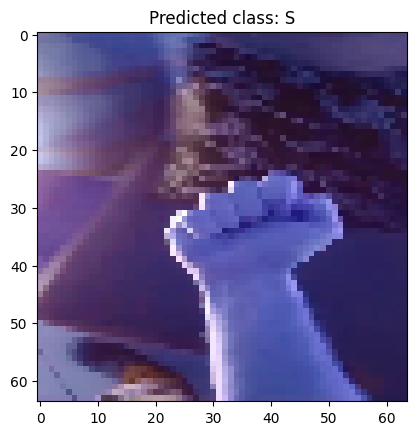

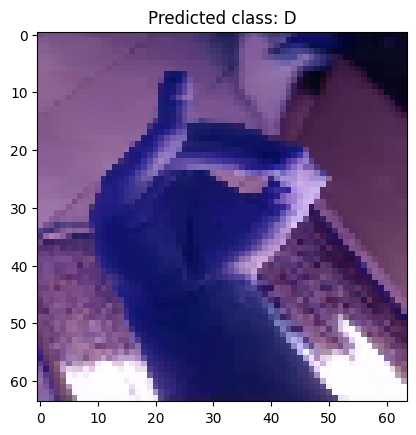

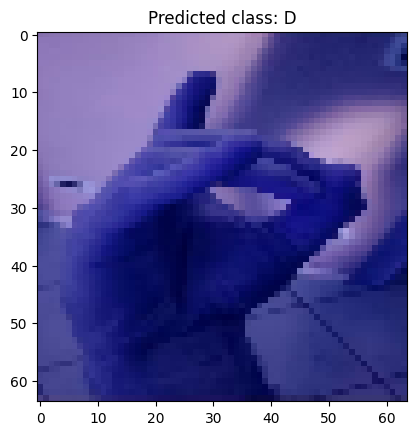

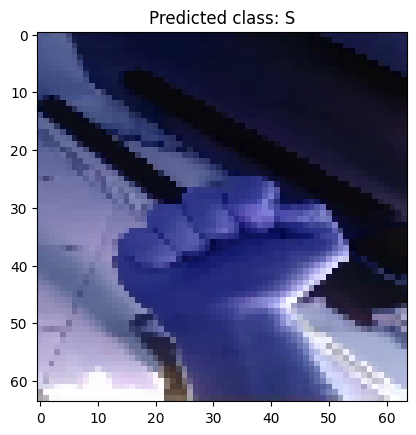

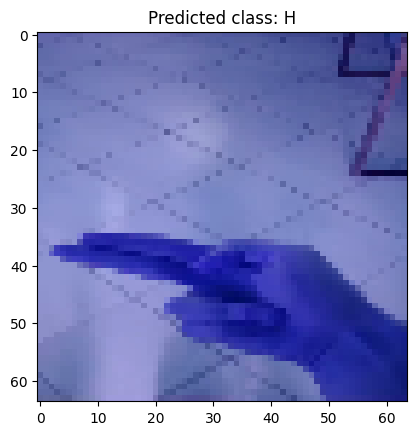

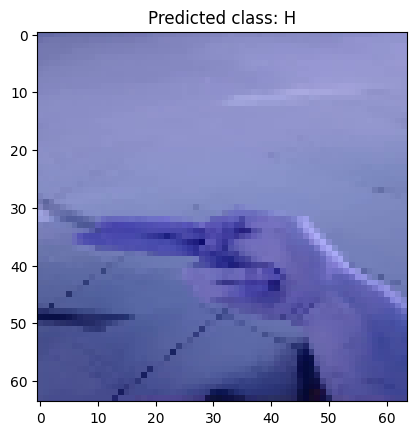

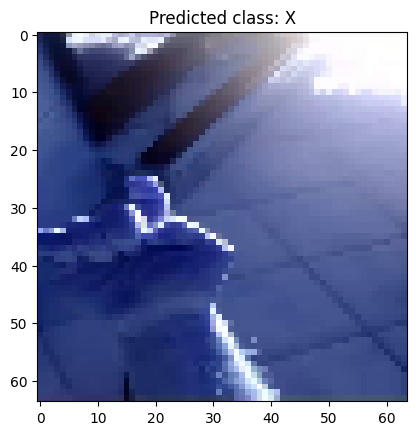

In [ ]:
# List of class labels corresponding to the indices
classes = ['D', 'H', 'K', 'S', 'X']

# Use the model to predict on the entire test set
# 'predictions' will hold the probability distribution for each class for each image
predictions = model.predict(x_test)

# Loop through the first 10 images in the test set
for i in range(10):
    # Find the index of the predicted class by finding the maximum probability
    predicted_class_index = np.argmax(predictions[i])  # Get the index of the highest probability

    # Use the predicted index to get the class label
    predicted_class = classes[predicted_class_index]  # Get the corresponding class name from the 'classes' list

    # Display the image
    plt.imshow(x_test_pict[i], cmap='gray')  # Show the image using the gray colormap (grayscale)
    plt.title(f'Predicted class: {predicted_class}')  # Set the title of the image as the predicted class label
    plt.show()  # Show the image

# Create a dictionary to match positional indices to letters

In [ ]:
# A dictionary that maps integer indices to class labels
# Each integer corresponds to a class in the dataset
labels = {
    0: 'D',  # Class 0 corresponds to 'D'
    1: 'H',  # Class 1 corresponds to 'H'
    2: 'K',  # Class 2 corresponds to 'K'
    3: 'S',  # Class 3 corresponds to 'S'
    4: 'X'   # Class 4 corresponds to 'X'
}

# Incorrect predictions classified

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Index: 140, Predicted: X, Expected: S


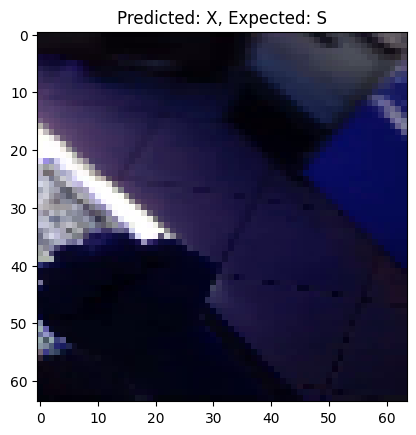

Index: 255, Predicted: X, Expected: S


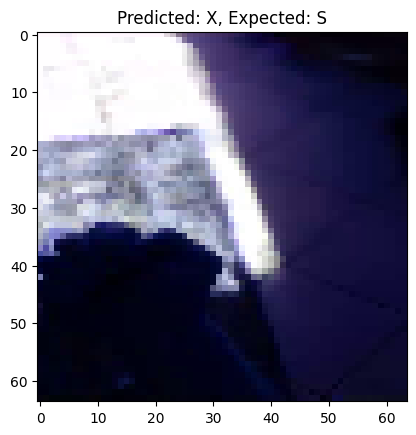

Index: 355, Predicted: X, Expected: S


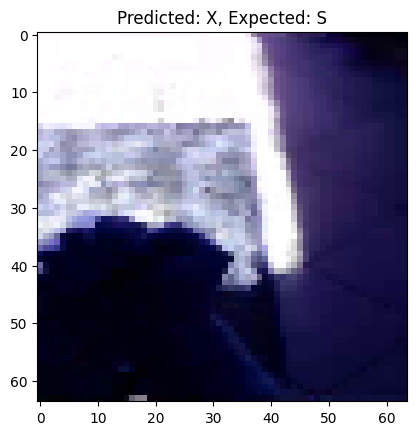

In [ ]:
# List to store information about incorrect predictions
incorrect_predictions = []

# Predict the classes for the test dataset
predictions = model.predict(x_test)

# Iterate through the predictions and the true labels (y_test)
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class index and the expected class index
    predicted, expected = np.argmax(p), np.argmax(e)

    # If the predicted class doesn't match the expected class, store the information
    if predicted != expected:
        incorrect_predictions.append((i, x_test_pict[i], labels[predicted], labels[expected]))

# Display the first 5 incorrect predictions
for idx, img, pred, exp in incorrect_predictions[:5]:
    # Print the index of the incorrect prediction, predicted class, and expected class
    print(f"Index: {idx}, Predicted: {pred}, Expected: {exp}")

    # Display the incorrect image with title showing predicted vs expected class
    plt.imshow(img)
    plt.title(f"Predicted: {pred}, Expected: {exp}")
    plt.show()

In [ ]:
# Get the total number of incorrect predictions
num_incorrect_predictions = len(incorrect_predictions)

# Print the total number of mistaken predictions
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 3


#Correct Predictions Classified

In [ ]:
# List to store information about correct predictions
correct_predictions = []

# Predict the classes for the test dataset
predictions = model.predict(x_test)

# Iterate through the predictions and the true labels (y_test)
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class index and the expected class index
    predicted, expected = np.argmax(p), np.argmax(e)

    # For the first 10 images, print the predicted and expected class
    if i < 10:
        print(f"Image {i}: Predicted {labels[predicted]} | Expected {labels[expected]}")

    # If the predicted class matches the expected class, store the information
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Calculate the total number of correct predictions
num_correct_predictions = len(correct_predictions)

# Print the total number of correct predictions and the total number of test images
print(f"Correct Predictions: {num_correct_predictions} out of {len(x_test)}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image 0: Predicted K | Expected K
Image 1: Predicted D | Expected D
Image 2: Predicted X | Expected X
Image 3: Predicted S | Expected S
Image 4: Predicted D | Expected D
Image 5: Predicted D | Expected D
Image 6: Predicted S | Expected S
Image 7: Predicted H | Expected H
Image 8: Predicted H | Expected H
Image 9: Predicted X | Expected X
Correct Predictions: 431 su 434


#Confusion Matrix

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Shape of y_test: (434, 5)
Shape of y_pred: (434, 5)
Confusion Matrix (DataFrame):
     D   H   K   S   X
D  101   0   0   0   0
H    0  66   0   0   0
K    0   0  93   0   0
S    0   0   0  95   3
X    0   0   0   0  76


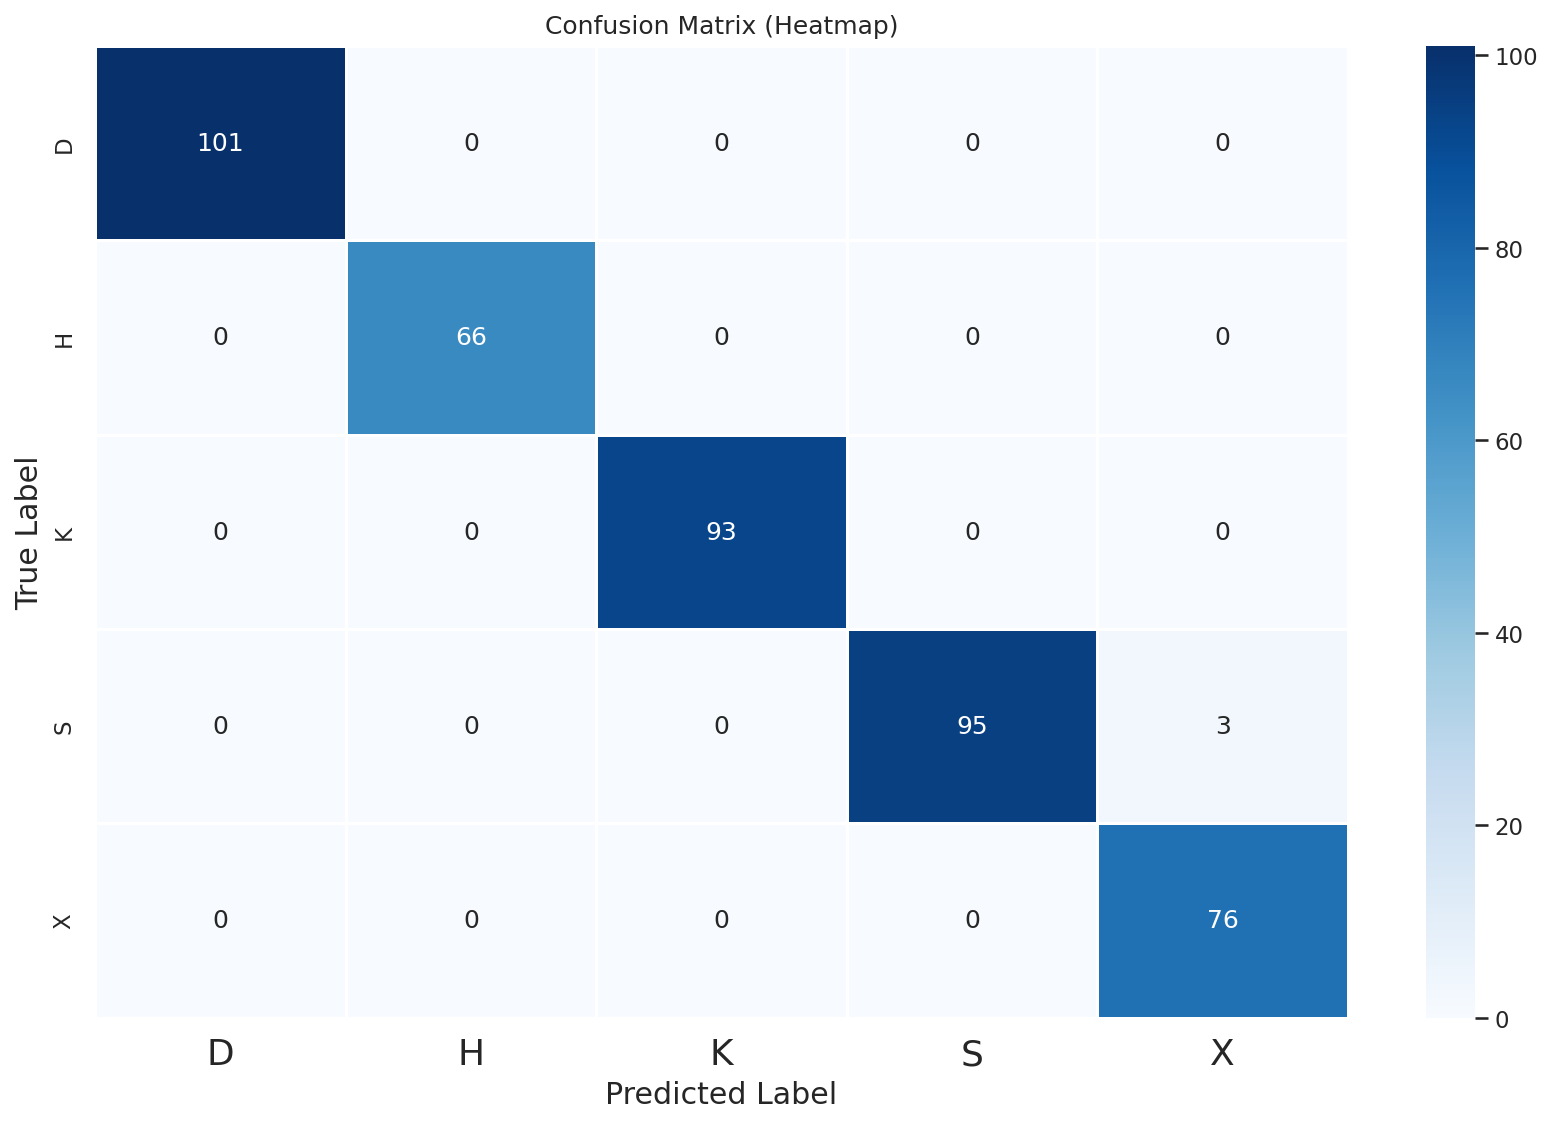

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import itertools

# Set style for the plots
# Use the 'fivethirtyeight' style for consistent aesthetics across the plots
plt.style.use('fivethirtyeight')

# Set up Seaborn style for better visualizations
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)

# Define global configuration parameters for the plots
params = {
    'axes.labelsize': "large",  # Set axes labels to a large font size
    'xtick.labelsize': 'x-large',  # Set x-axis tick labels to an extra-large font size
    'legend.fontsize': 20,  # Set legend font size to 20
    'figure.dpi': 150,  # Set the resolution of the figure (higher means sharper)
    'figure.figsize': [25, 7]  # Set the default figure size to 25x7 inches
}

# Update the plotting parameters
plt.rcParams.update(params)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,  # Optional: if True, normalize the matrix
                          title='Confusion Matrix',  # Title of the plot
                          cmap=plt.cm.Blues):  # Color map for the heatmap
    """
    This function plots the confusion matrix.
    """
    # If normalize is True, convert the matrix values to percentages (relative to row sums)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a heatmap to display the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Set the plot title
    plt.colorbar()  # Show a color bar for the heatmap

    # Set tick marks for the x and y axes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # Label x-axis with class names, rotated for clarity
    plt.yticks(tick_marks, classes)  # Label y-axis with class names

    # Set a threshold for coloring the text inside the heatmap cells
    thresh = cm.max() / 2.  # Half of the maximum value of the confusion matrix

    # Annotate the heatmap with the values of each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{cm[i, j]}',  # Display values (normalized or raw)
                 horizontalalignment="center",  # Center the text in the cell
                 color="white" if cm[i, j] > thresh else "black")  # Adjust text color based on cell value

    plt.tight_layout()  # Ensure layout is tight and labels are not cut off
    plt.ylabel('True label')  # Label for y-axis
    plt.xlabel('Predicted label')  # Label for x-axis

# Make predictions on the test data
y_pred = model.predict(x_test)  # Get model predictions for the test data

# Define class labels
labels_cm = ("D", "H", "K", "S", "X")  # These are the class labels for your data

# Check the shape of y_test and y_pred to ensure they match the expected format
print(f"Shape of y_test: {y_test.shape}")  # Print shape of true test labels
print(f"Shape of y_pred: {y_pred.shape}")  # Print shape of predicted test labels

# If y_test is one-hot encoded, convert it to a 1D label array by taking the index of the maximum value
if y_test.ndim > 1:  # If y_test is a 2D array (one-hot encoded)
    y_test = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels

# Compute the confusion matrix by comparing the true labels with the predicted labels
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))  # Compare true and predicted labels

# Convert the confusion matrix to a DataFrame for better visualization
df_cm = pd.DataFrame(confusion_mtx, index=labels_cm, columns=labels_cm)
print("Confusion Matrix (DataFrame):")
print(df_cm)  # Print the confusion matrix as a DataFrame

# Plot the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(12, 8))  # Set the figure size for the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)  # Create heatmap with annotations
plt.title("Confusion Matrix (Heatmap)")  # Set the plot title
plt.ylabel("True Label")  # Label for y-axis
plt.xlabel("Predicted Label")  # Label for x-axis
plt.show()  # Display the heatmap plot

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

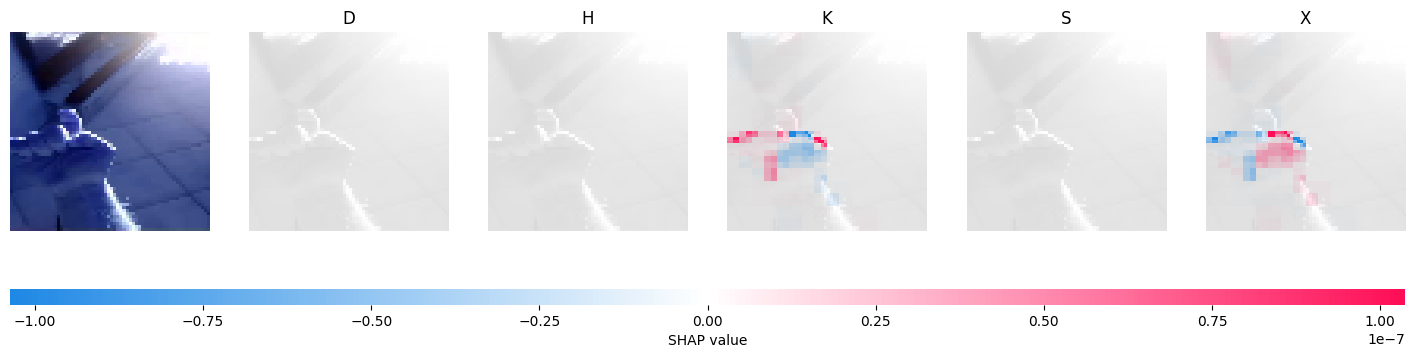

In [ ]:
import shap
# Assuming you have a pre-trained model called `model`
def f(x):
    # The model function that simply takes in data and returns model predictions
    tmp = x.copy()  # Creating a copy of input to avoid changing the original
    return model(tmp)  # Pass the data through the model to get predictions
labels_cm = ("D", "H", "K", "S", "X")
# Step 1: Define masker for image data (with a blur operation)
# A masker defines how we mask or manipulate the image for SHAP values computation
# In this case, "blur(32,32)" indicates a blur of 32x32 pixels
masker_blur = shap.maskers.Image("blur(32,32)", x_test[1].shape)  # Adjust the blur size if needed

# Step 2: Select the first image from x_test for evaluation
ind = [10]  # Use the first image (index 0) from x_test for SHAP computation

# Step 3: Check if the image is in the correct range
# Ensure the image is within the expected range of values (0 to 255 for integers, or 0.0 to 1.0 for floats)
x_test_processed = x_test[ind]  # Select the image for processing

# Step 4: Ensure x_test_processed is in the correct range
if x_test_processed.max() <= 255:
    # If it's in the 0-255 range, clip to ensure it stays within bounds
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If it's in the 0.0-1.0 range, clip to ensure it stays within bounds
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create the SHAP explainer
# The explainer is used to calculate SHAP values for the selected image
# We are using the masker with blur and specifying the output names corresponding to 5 classes (assumed here)
explainer = shap.Explainer(f, masker_blur, output_names=labels_cm)  # Assuming 5 output classes

# Step 6: Calculate SHAP values using the original x_test data
# SHAP values indicate the contribution of each pixel to the model's prediction
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)  # Adjust batch_size as needed

# Step 7: Visualize the SHAP values for the selected image
# SHAP image plot visualizes the contributions of each pixel to the model's decision
shap.image_plot(shap_values_[0], show=True)  # This will display the image with its SHAP values

# Testing against the original dataset

In [ ]:
# Load the test data and corresponding labels
x_test = np.load('olddata64.npy')  # Load the test images dataset
y_test = np.load('labels64.npy')   # Load the corresponding labels for the test images

# Verify the dimensions and pixel range
print(f"Shape of the loaded images: {x_test.shape}")  # Print the shape (dimensions) of the test images
print(f"Pixel range: Min {x_test.min()}, Max {x_test.max()}")  # Print the minimum and maximum pixel values of the images
print(len(y_test))  # Print the length (number) of labels

Shape delle immagini caricate: (15000, 64, 64, 3)
Range dei pixel: Min 0.0, Max 1.0
15000


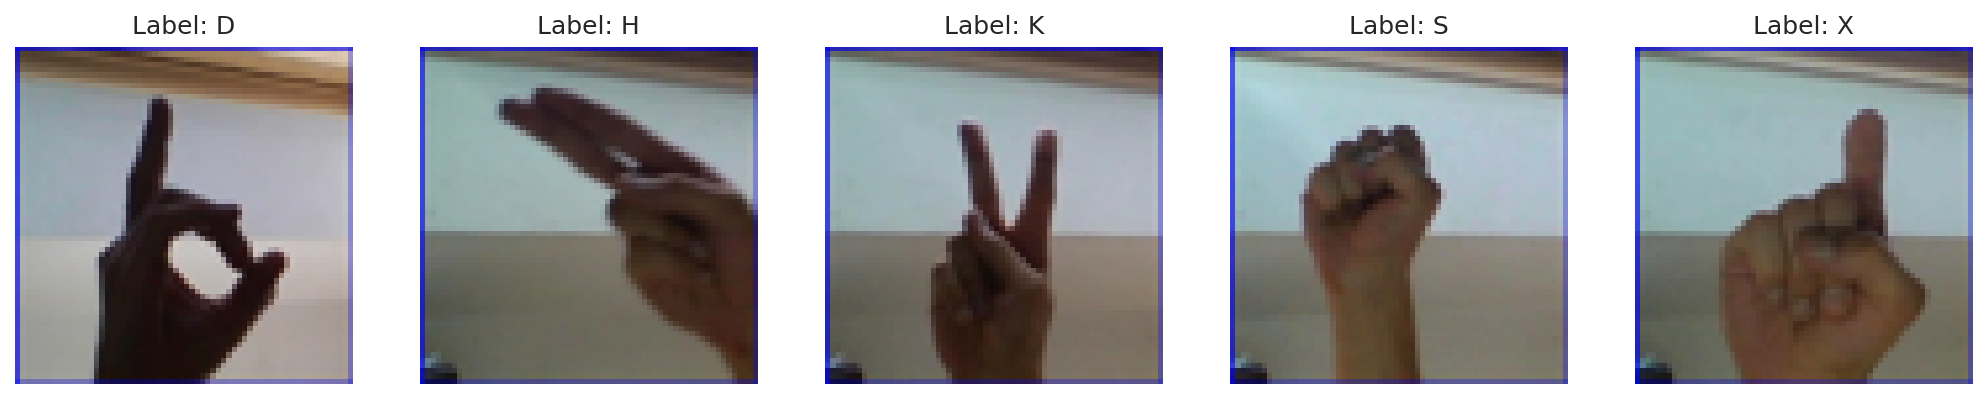

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the test images and labels
x_test = np.load('olddata64.npy')  # Test image data
y_test = np.load('labels64.npy')   # Test labels

# Denormalize the images (convert from 0-1 range to 0-255 range)
x_test_img = x_test * 255

# Create a figure with subplots for each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

# Iterate through each class to display one image from each class
for i, label in enumerate(classes):

    # Get the indices of images that belong to the current class
    class_indices = np.where(y_test == i)[0]

    # Select the first image from the class
    image_index = class_indices[0]
    image = x_test_img[image_index]

    # Display the image
    axes[i].imshow(image.astype(np.uint8))  # Convert image to uint8 for proper display
    axes[i].set_title(f"Label: {label}")    # Title for the image
    axes[i].axis('off')  # Remove axis for better visual

# Show the plot with all class images
plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


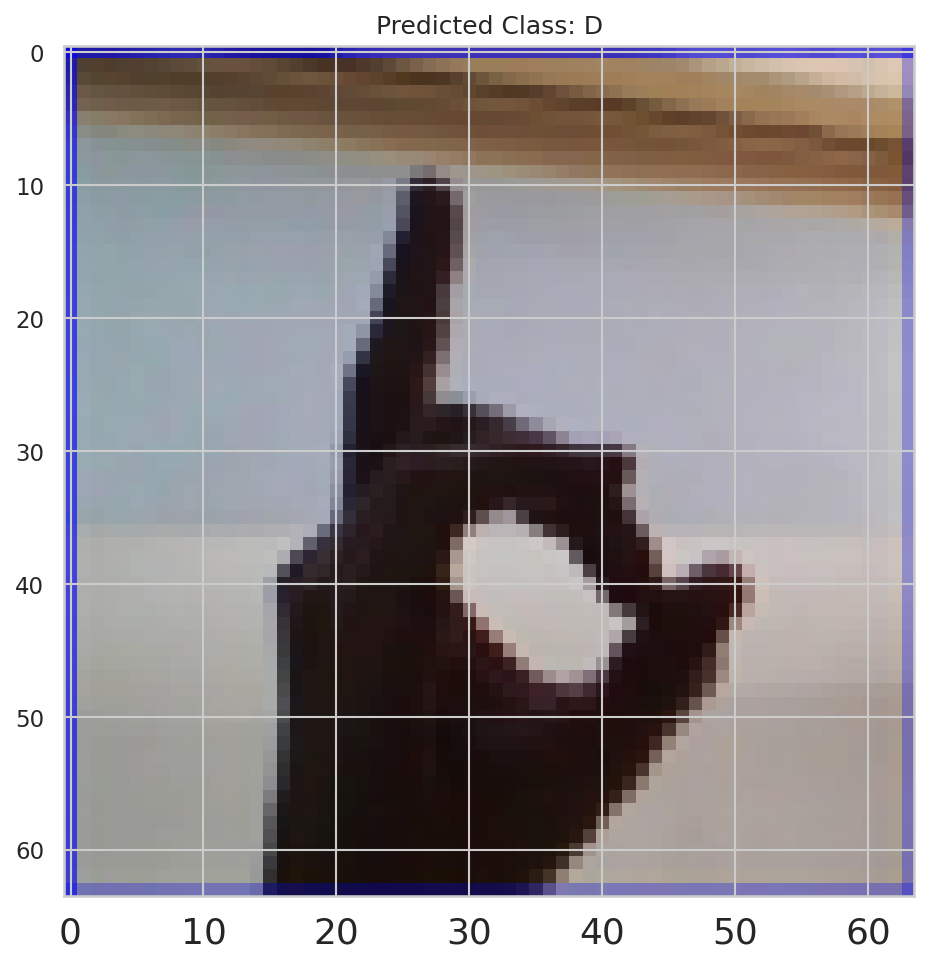

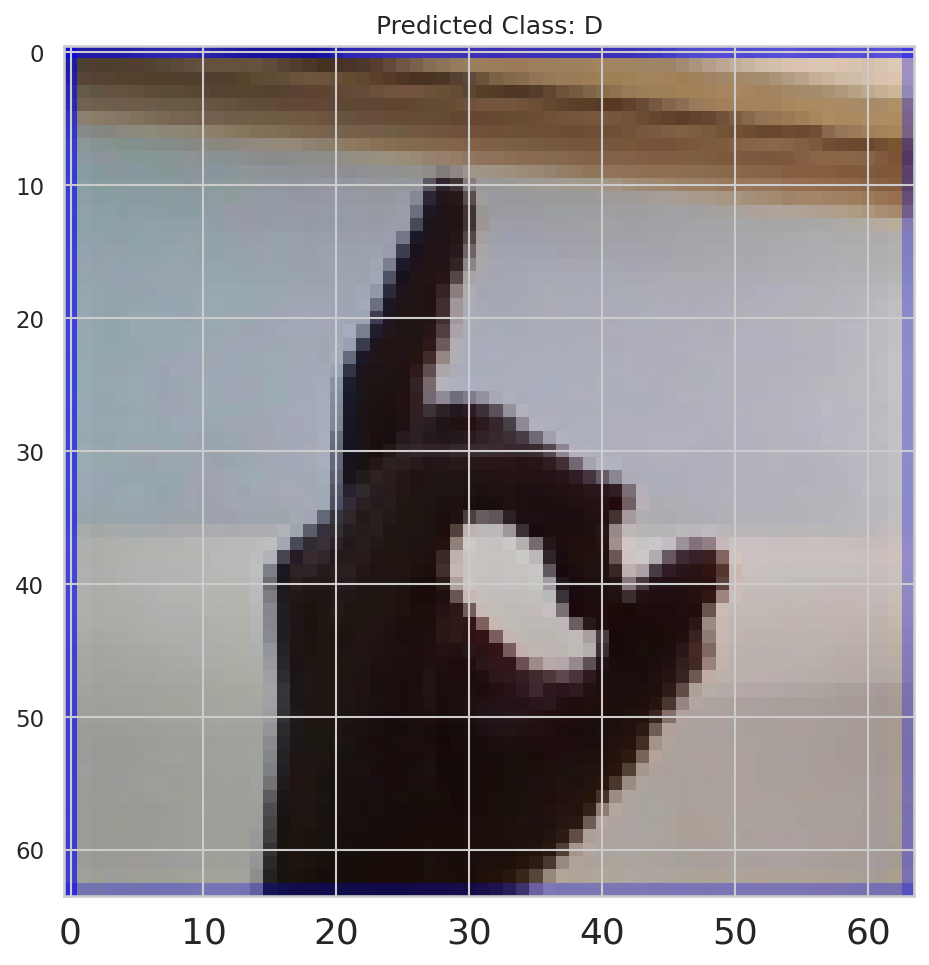

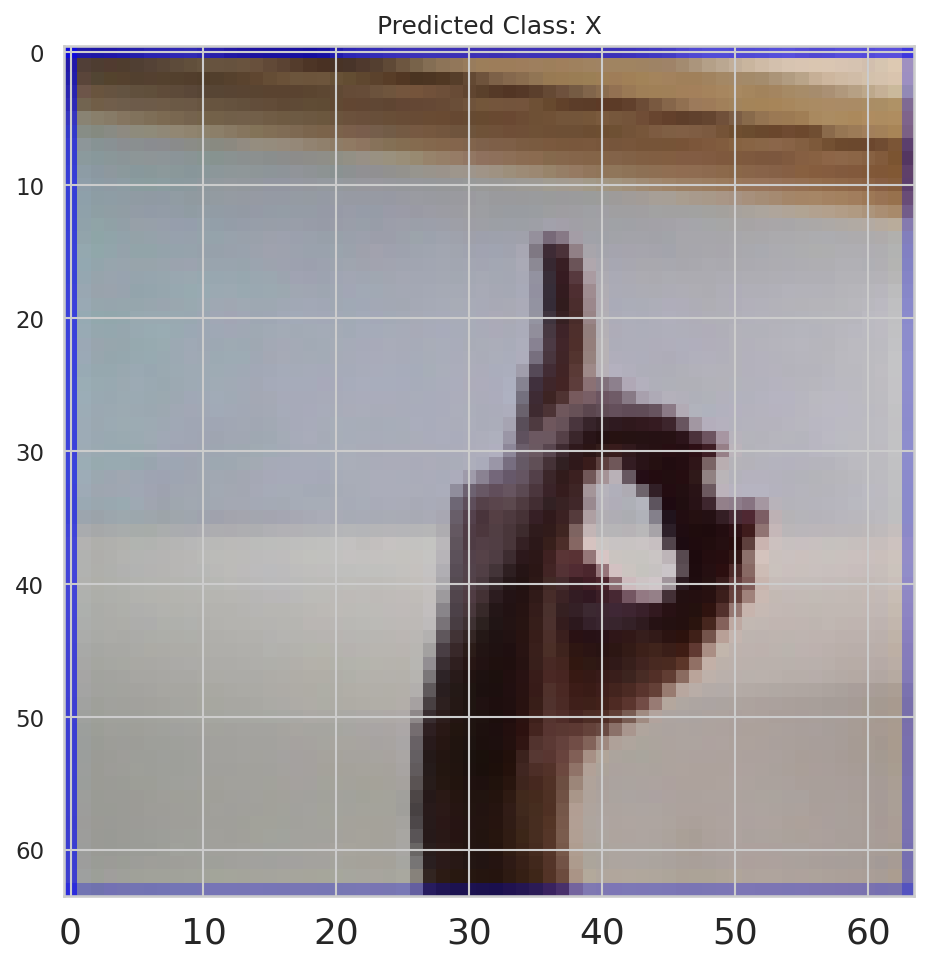

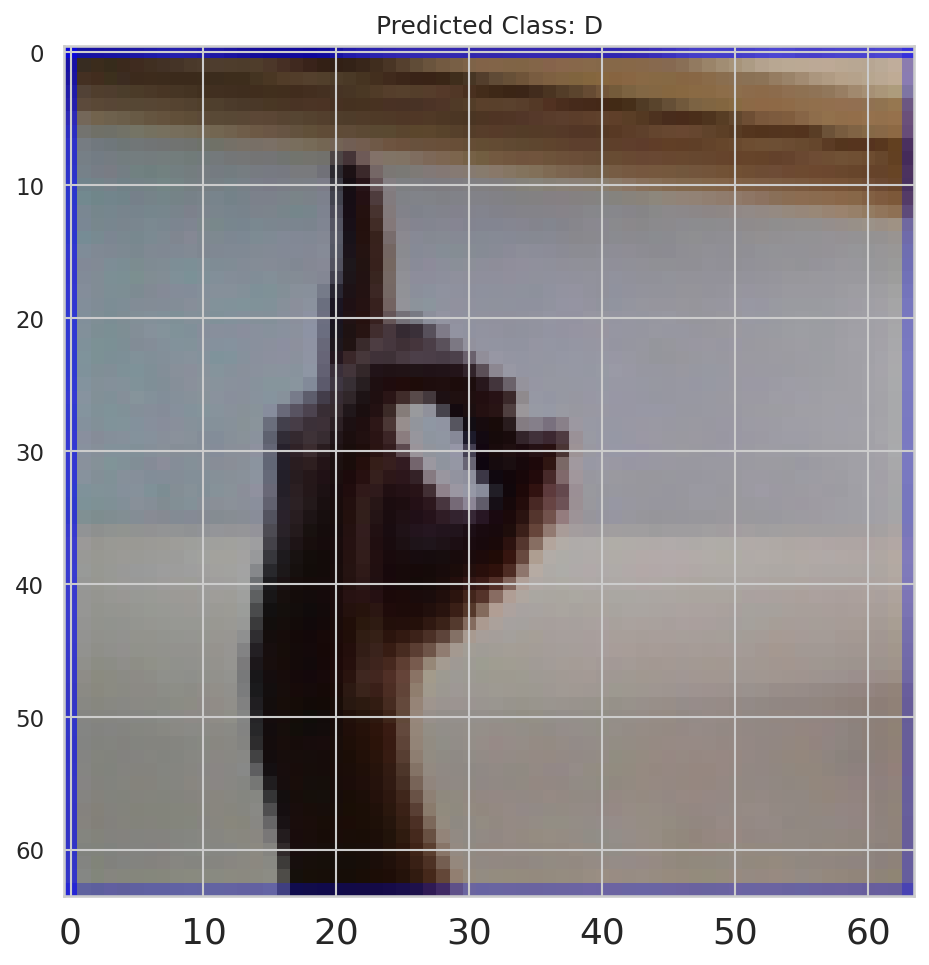

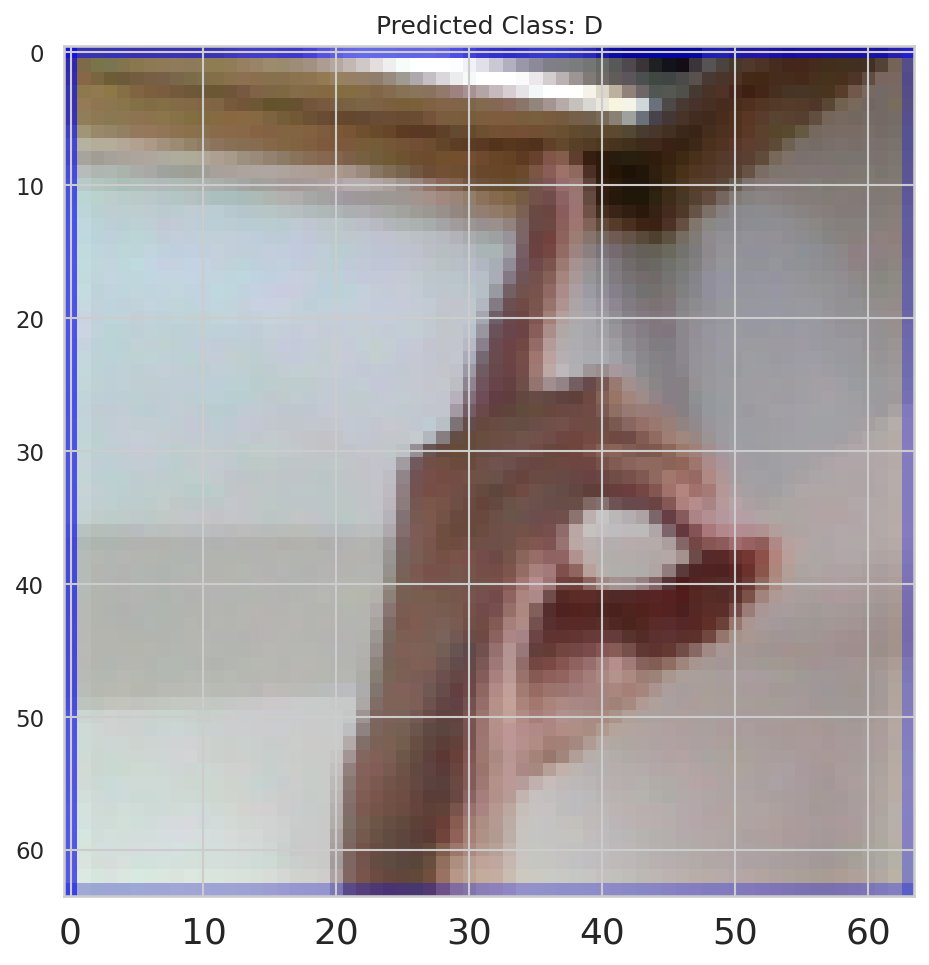

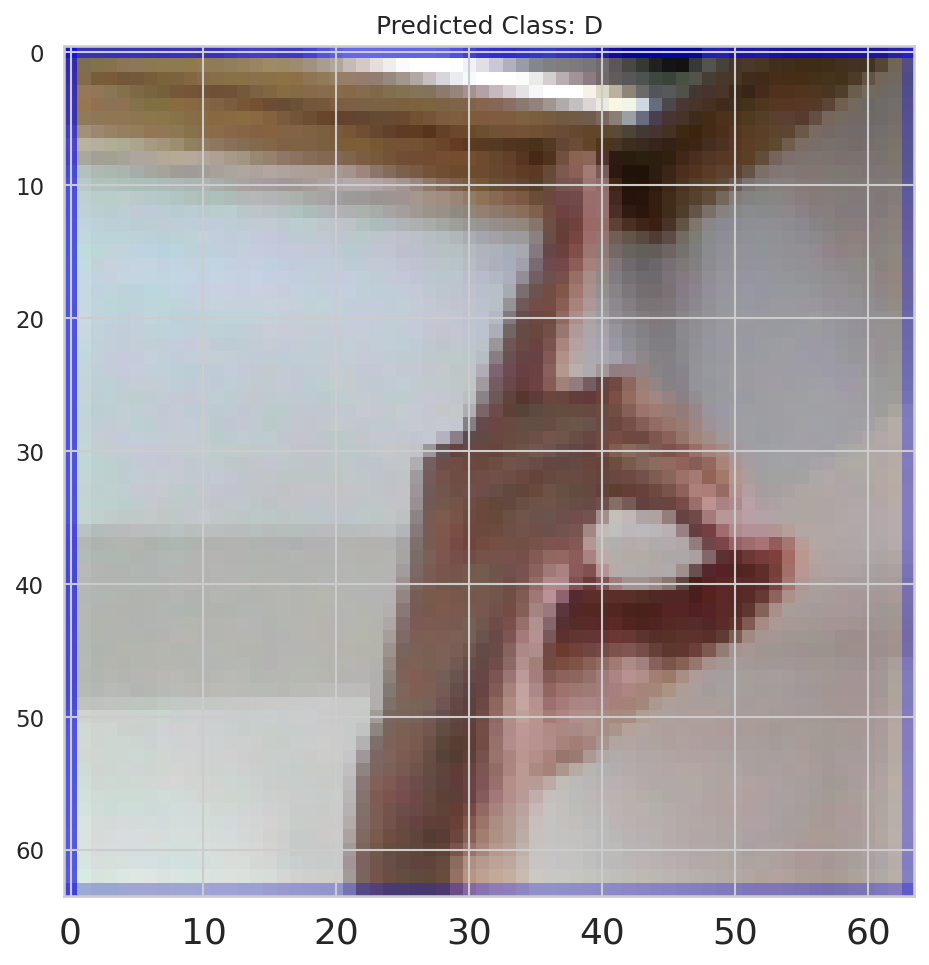

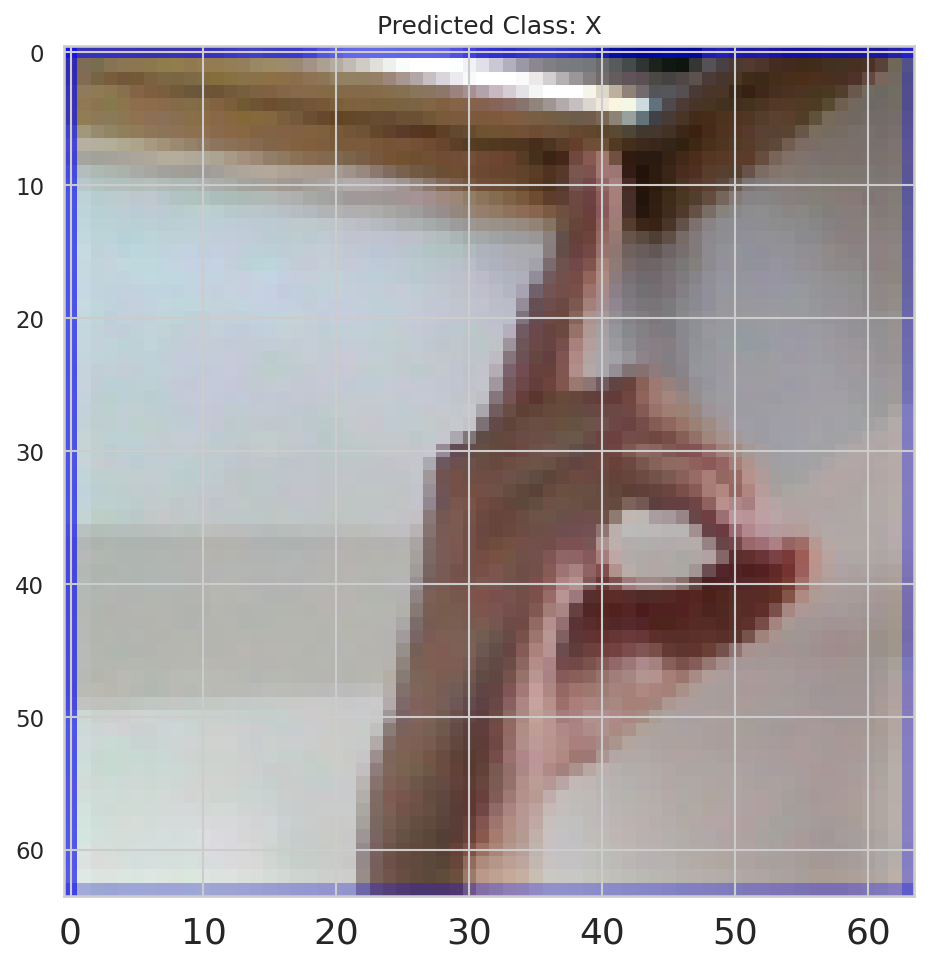

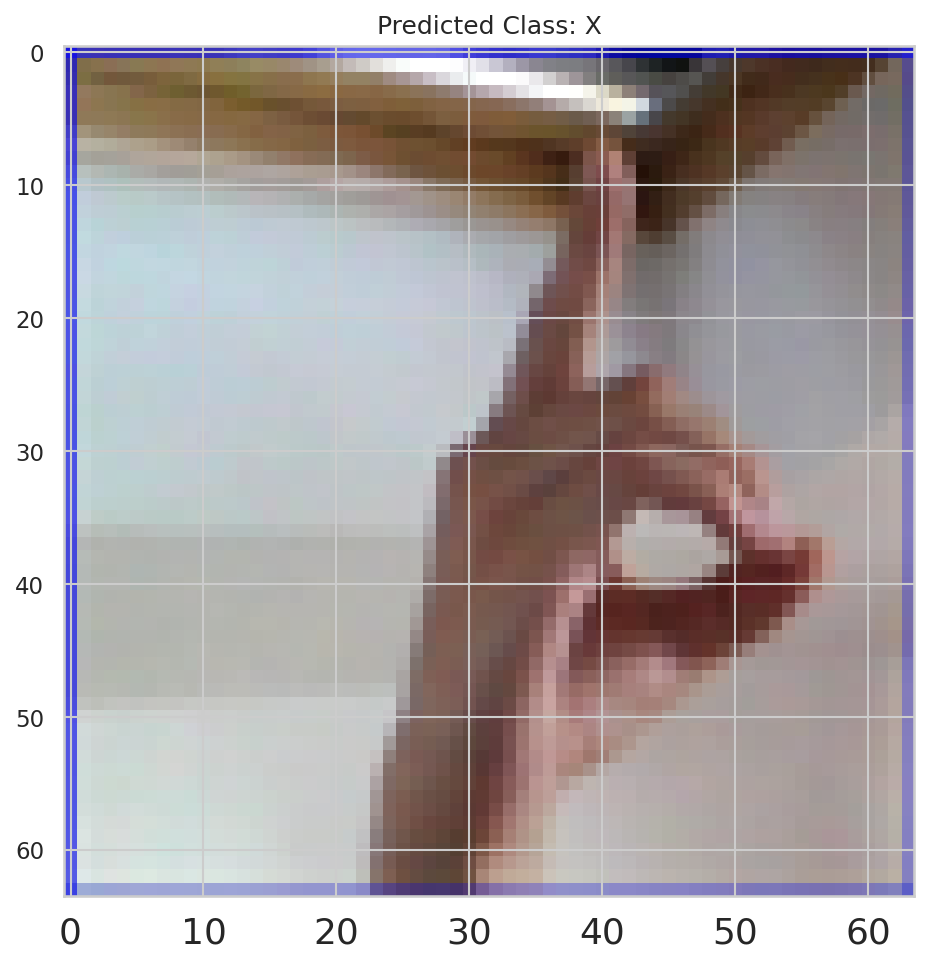

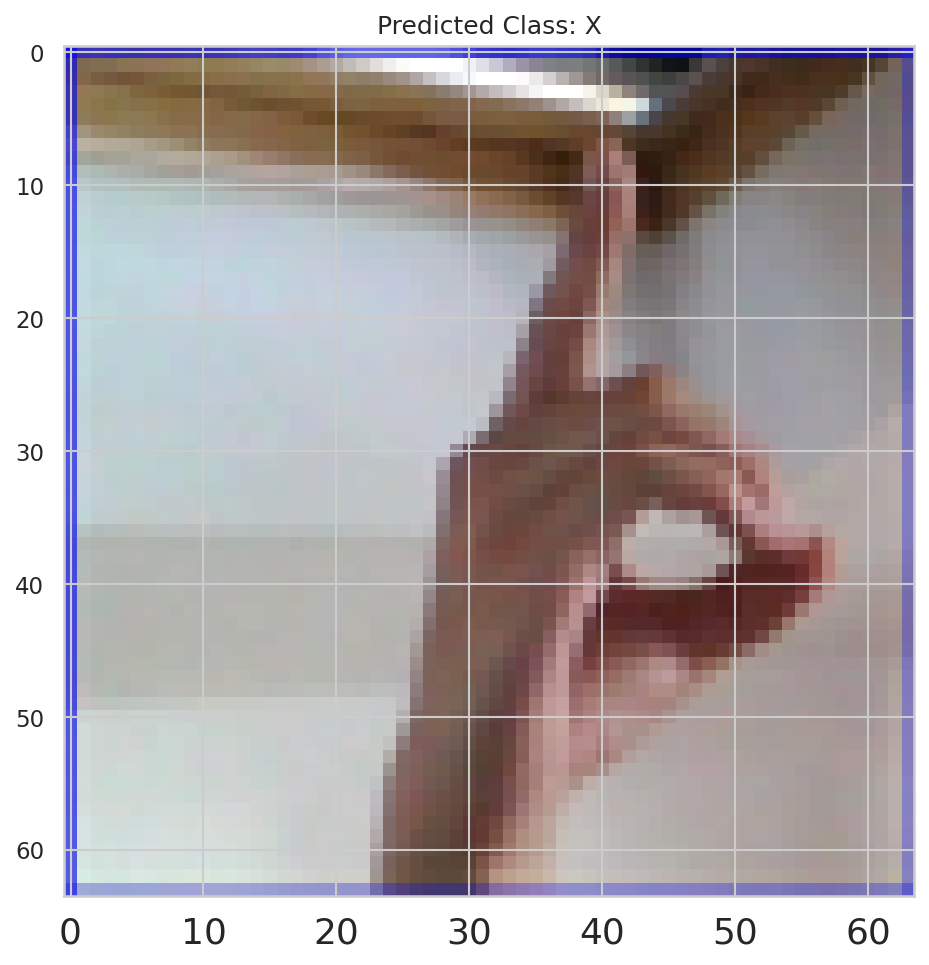

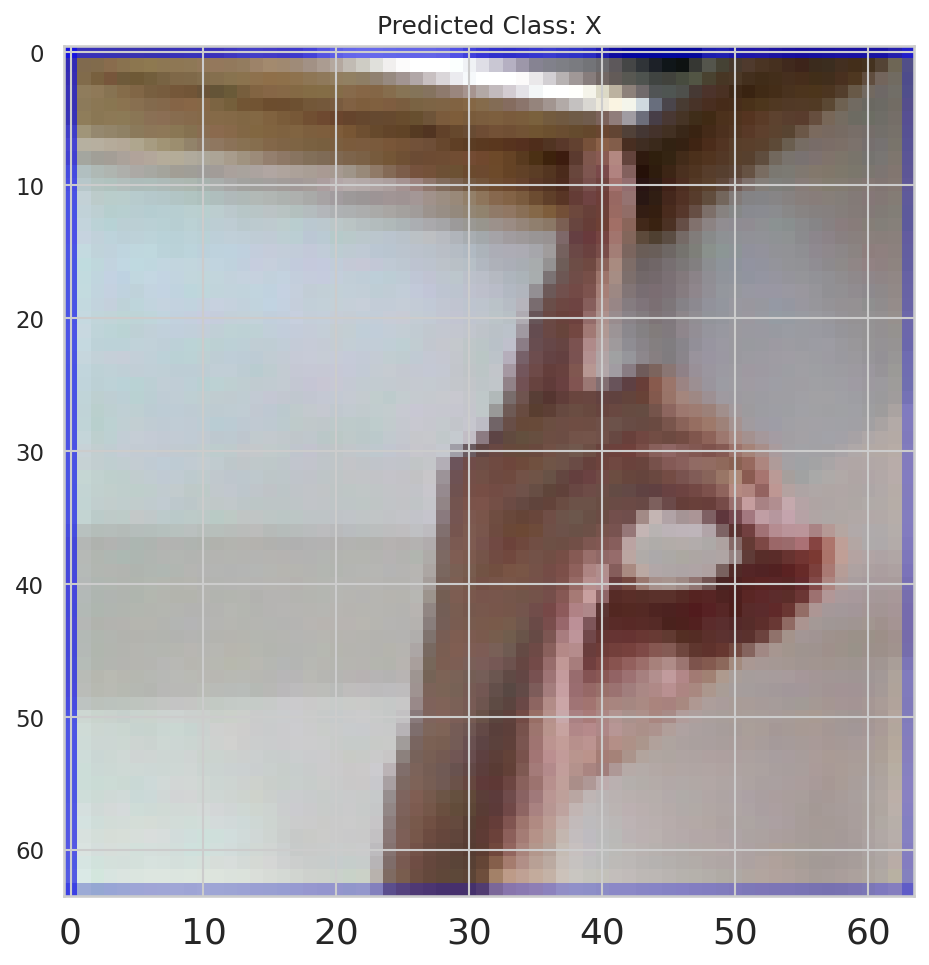

In [ ]:
classes = ['D', 'H', 'K', 'S', 'X']  # Define class labels

# Get model predictions on the test set
predictions = model.predict(x_test_img)  # Model predictions on the test images

# Loop to display first 10 images and their predicted labels
for i in range(10):
    # Get the predicted class index (highest probability)
    predicted_class_index = np.argmax(predictions[i])  # Get the index of the class with the highest probability
    predicted_class = classes[predicted_class_index]  # Map the index to the class label

    # Display the image with the predicted class label
    plt.imshow(x_test[i], cmap='gray')  # Display the image using grayscale colormap
    plt.title(f'Predicted Class: {predicted_class}')  # Set title with predicted class
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()  # Show the image

#Incorrect Predictions

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Index: 2, Predict: X, Expected: D


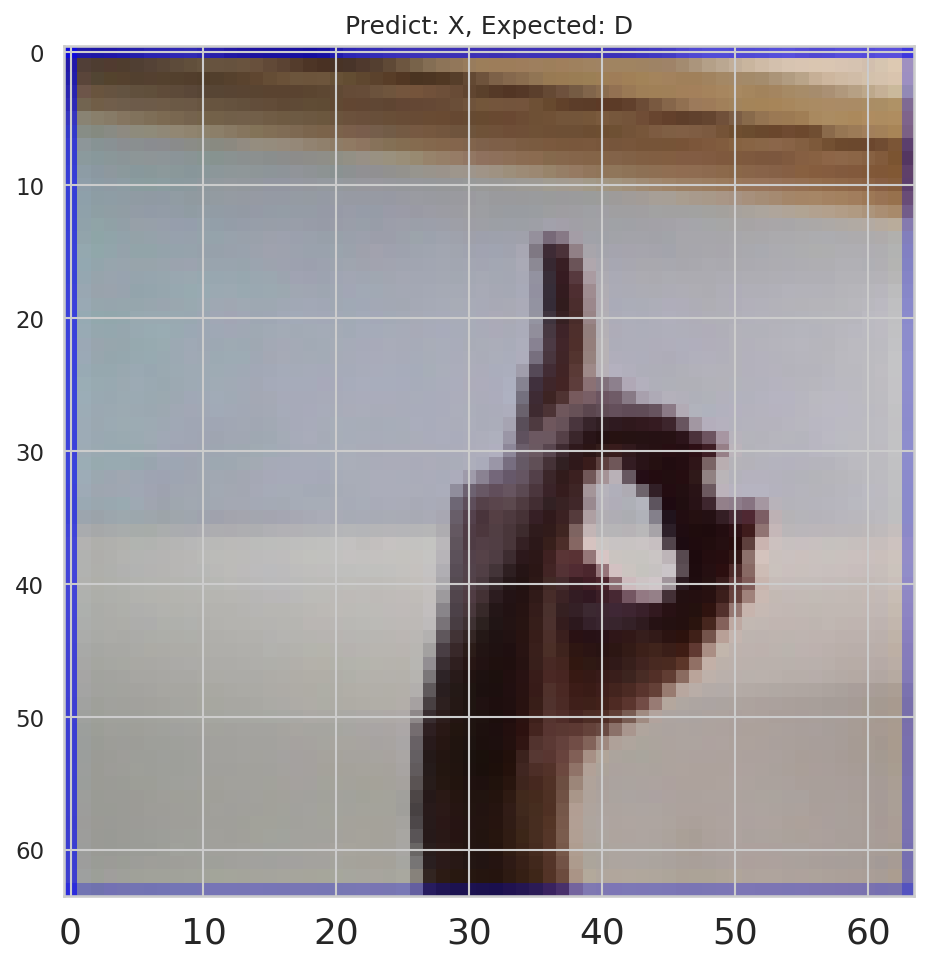

Index: 6, Predict: X, Expected: D


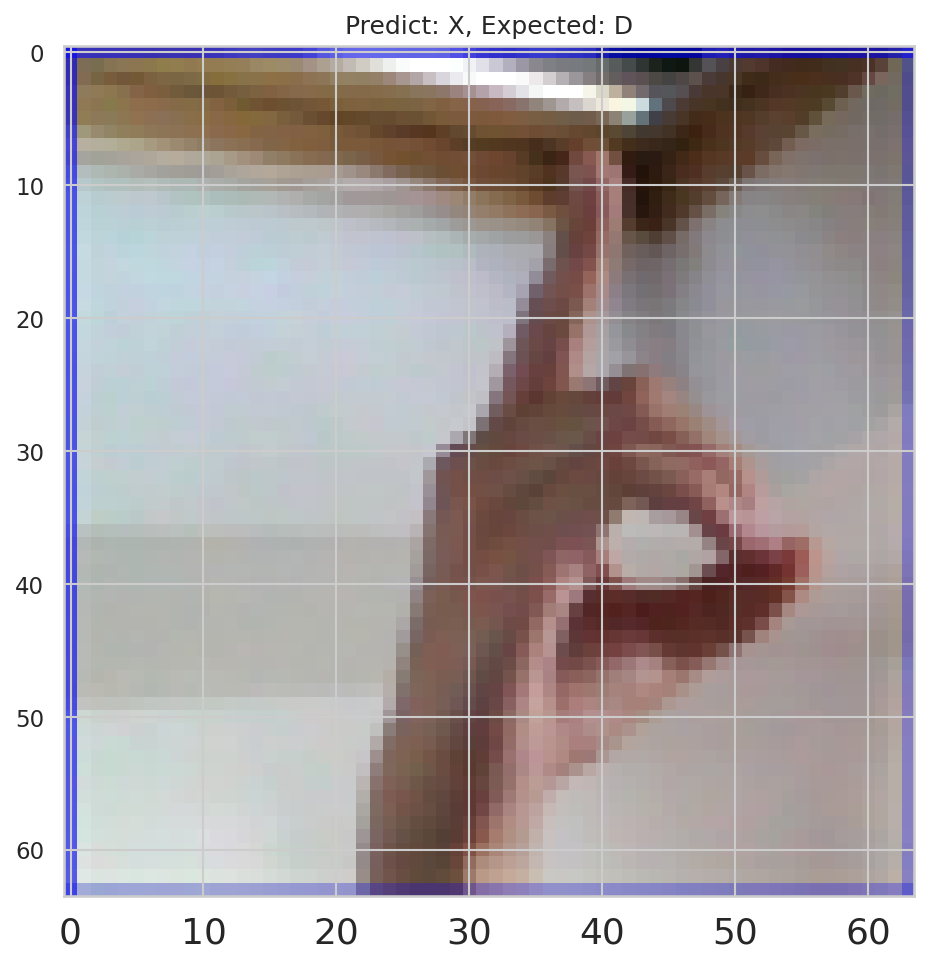

Index: 7, Predict: X, Expected: D


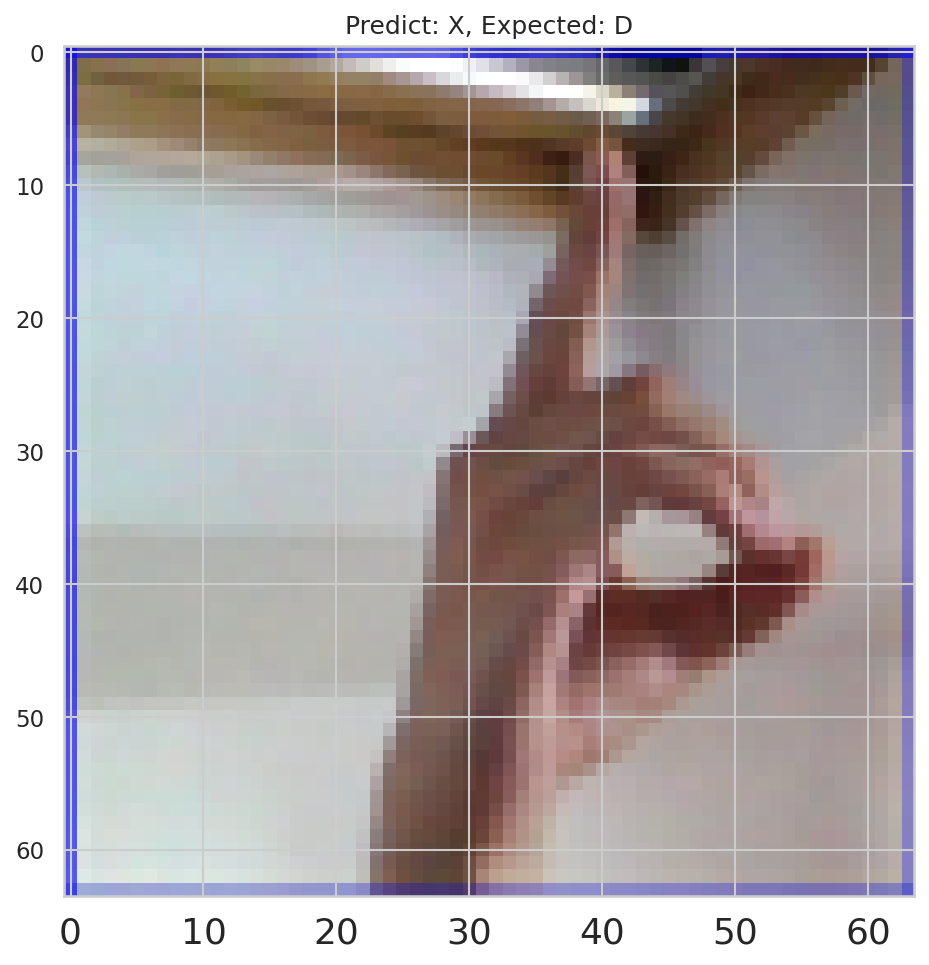

Index: 8, Predict: X, Expected: D


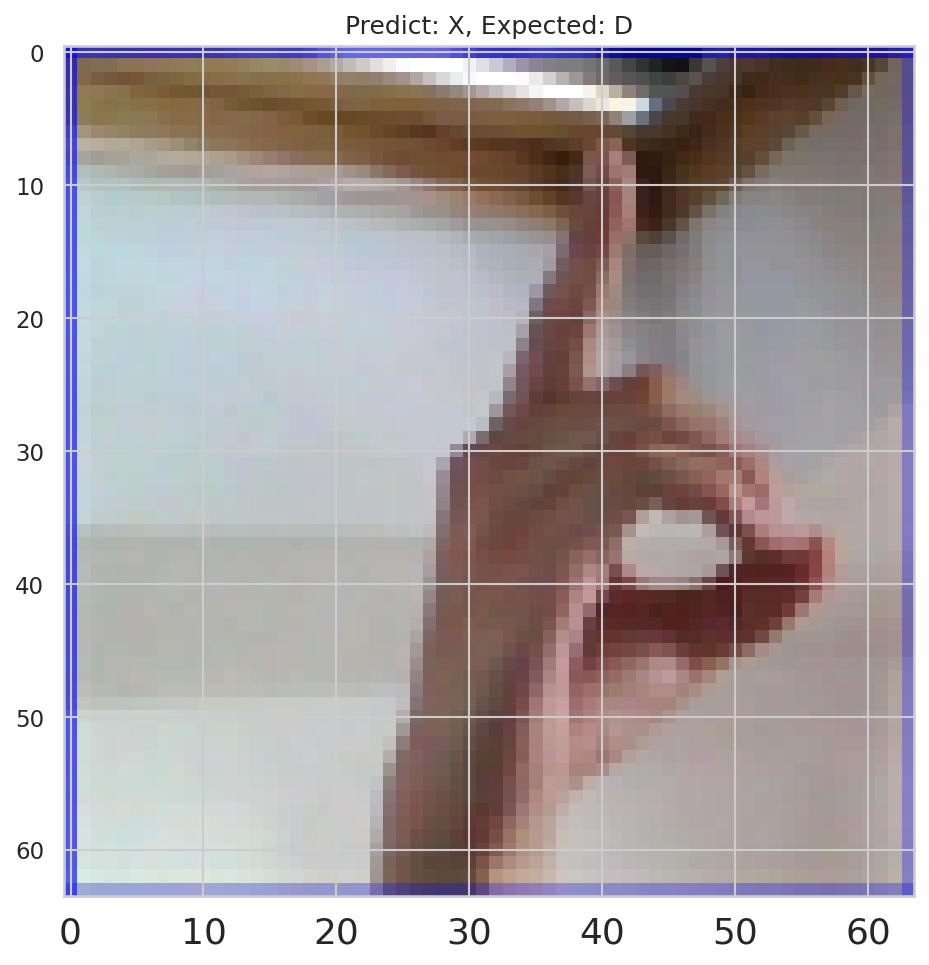

Index: 9, Predict: X, Expected: D


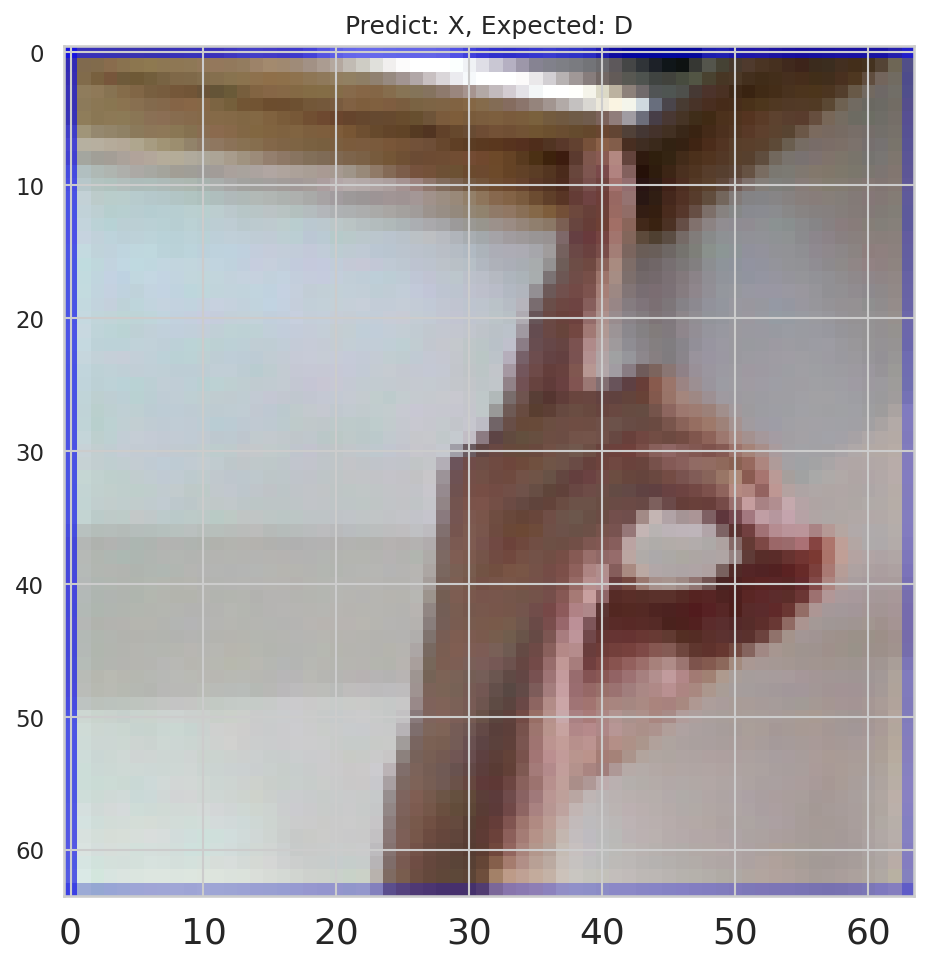

In [ ]:
incorrect_predictions = []  # List to store details of incorrect predictions

# Predict using the model on the test images
predictions = model.predict(x_test_img)

# Iterate through predictions and expected labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)  # Get the predicted and expected class indices

    # If prediction is incorrect, store the details
    if predicted != expected:
        incorrect_predictions.append((i, x_test[i], labels[predicted], labels[expected]))  # Store the incorrect prediction

# Display first 5 incorrect predictions
for idx, img, pred, exp in incorrect_predictions[:5]:
    print(f"Index: {idx}, Predicted: {pred}, Expected: {exp}")  # Print index, predicted and expected labels
    plt.imshow(img)  # Show the incorrect image
    plt.title(f"Predicted: {pred}, Expected: {exp}")  # Set title with predicted and expected labels
    plt.axis('off')  # Hide axes for a cleaner view
    plt.show()  # Display the image

In [ ]:
num_incorrect_predictions = len(incorrect_predictions)  # Count how many incorrect predictions

# Print the total number of mistaken predictions
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 12556


#Correct Predictions

In [ ]:
correct_predictions = []  # List to hold correct predictions

# Get model predictions
predictions = model.predict(x_test_img)

# Iterate over predictions and true labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)  # Get the predicted and expected class indices

    # For the first 10 images, print the predicted and expected labels
    if i < 10:
        print(f"Image {i}: Predicted {labels[predicted]} | Expected {labels[expected]}")

    # If the prediction is correct, add it to the correct_predictions list
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Count the correct predictions
num_correct_predictions = len(correct_predictions)

# Print the number of correct predictions and total test size
print(f"Correct Predictions: {num_correct_predictions} out of {len(x_test)}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Image 0: Predicted D | Expected D
Image 1: Predicted D | Expected D
Image 2: Predicted X | Expected D
Image 3: Predicted D | Expected D
Image 4: Predicted D | Expected D
Image 5: Predicted D | Expected D
Image 6: Predicted X | Expected D
Image 7: Predicted X | Expected D
Image 8: Predicted X | Expected D
Image 9: Predicted X | Expected D
Correct Predictions: 2444 su 15000


#Confusion Matrix

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Shape of y_test: (15000,)
Shape of y_pred: (15000, 5)
Confusion Matrix (DataFrame):
      D  H  K  S     X
D  1145  0  0  0  1855
H    10  0  0  0  2990
K   619  0  5  0  2376
S   325  0  0  0  2675
X   345  0  0  0  2655


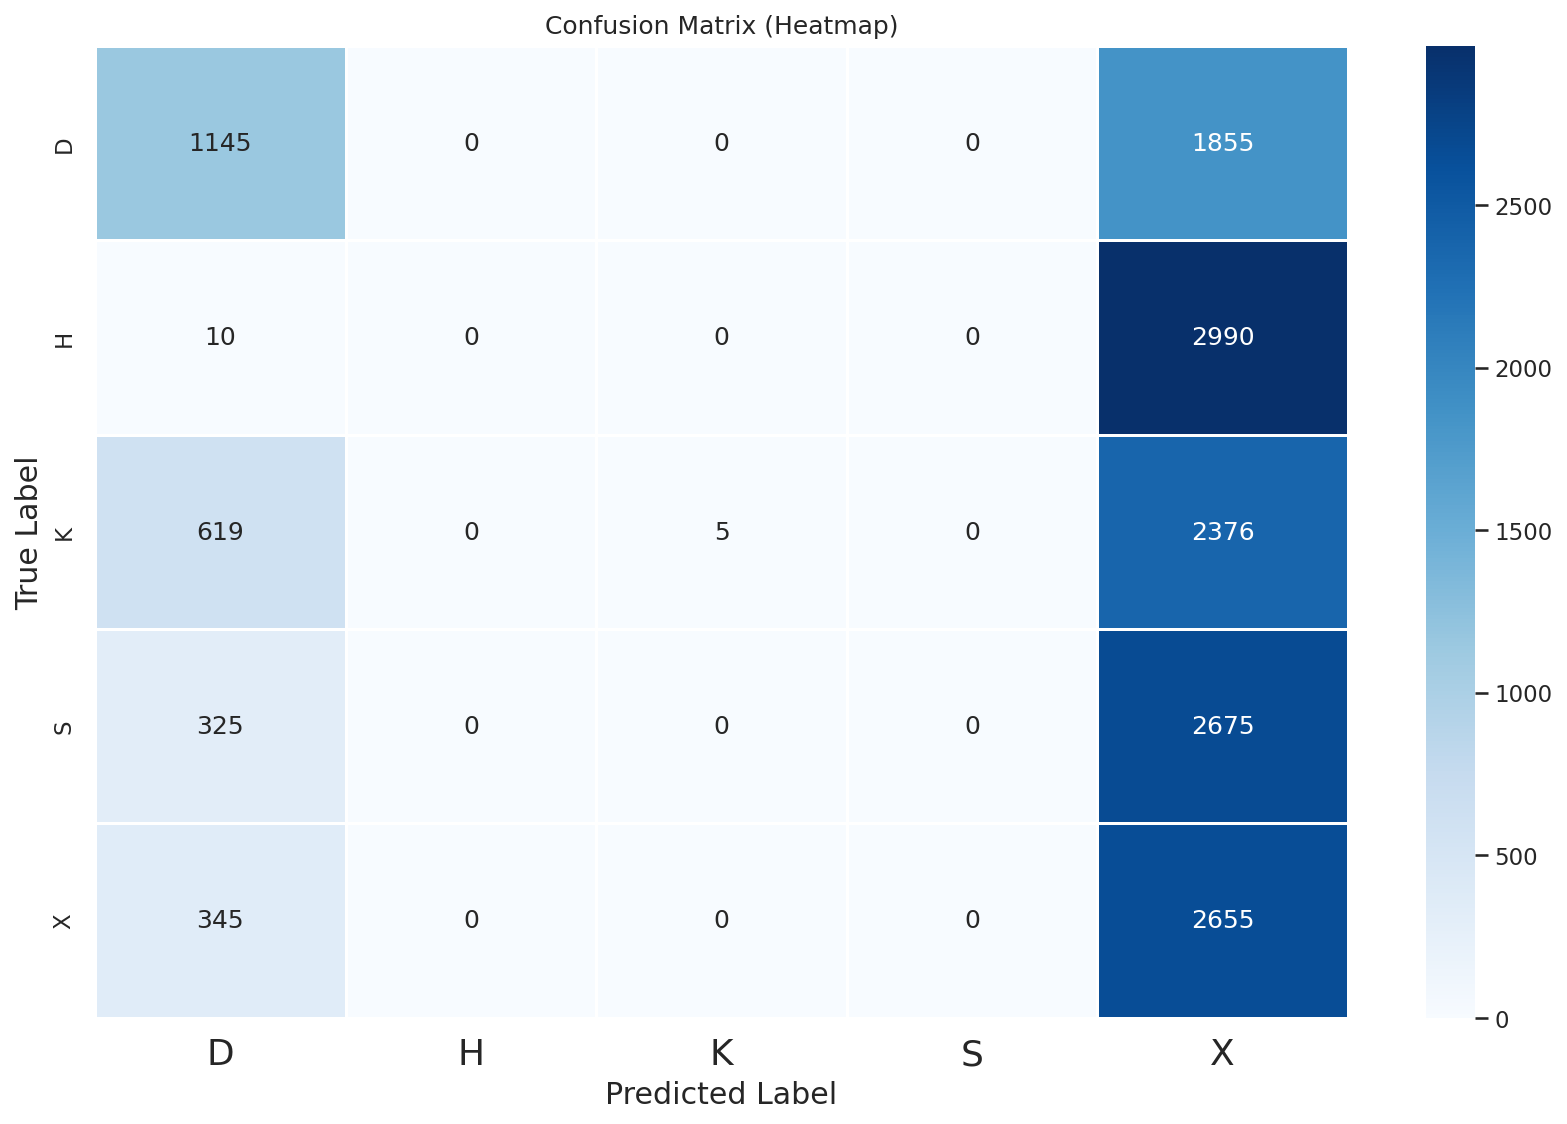

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import itertools

# Set style for the plots
plt.style.use('fivethirtyeight')  # Use a pre-defined plot style for the visual appearance
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)  # Set Seaborn style for plots

# Global plot configuration parameters
params = {
    'axes.labelsize': "large",  # Set label size for axes
    'xtick.labelsize': 'x-large',  # Set size for x-axis ticks
    'legend.fontsize': 20,  # Set font size for the legend
    'figure.dpi': 150,  # Set the figure resolution
    'figure.figsize': [25, 7]  # Set the figure size for the plot
}

plt.rcParams.update(params)  # Apply the custom global parameters to plots

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Parameters:
    - cm: confusion matrix values
    - classes: list of class names/labels
    - normalize: whether to normalize the confusion matrix
    - title: title of the plot
    - cmap: colormap for the plot
    """
    if normalize:
        # Normalize confusion matrix by row (true labels)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Display the matrix using the provided colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()  # Add color bar to the side
    tick_marks = np.arange(len(classes))  # Create tick marks for the classes
    plt.xticks(tick_marks, classes, rotation=45)  # Set x-axis labels
    plt.yticks(tick_marks, classes)  # Set y-axis labels

    thresh = cm.max() / 2.  # Calculate the threshold for text color based on max value
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Annotate each cell with the value, either normal or normalized
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  # Ensure the layout is tight and labels fit
    plt.ylabel('True label')  # Y-axis label
    plt.xlabel('Predicted label')  # X-axis label

# Make predictions
y_pred = model.predict(x_test_img)  # Predictions made by the model on test data

labels_cm = ("D", "H", "K", "S", "X")  # Define the class labels for the confusion matrix

# Check the shape of y_test and y_pred to see if they're one-hot encoded or label arrays
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# If y_test is one-hot encoded, use argmax to convert it to label format
if y_test.ndim > 1:  # If y_test is a 2D array (one-hot encoded)
    y_test = np.argmax(y_test, axis=1)  # Convert to label index format (one-hot -> class label)

# Calculate the confusion matrix by comparing true labels and predicted labels
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))  # Compare true labels with predicted labels

# Create a DataFrame for better visualization of the confusion matrix
df_cm = pd.DataFrame(confusion_mtx, index=labels_cm, columns=labels_cm)
print("Confusion Matrix (DataFrame):")
print(df_cm)  # Print the confusion matrix

# Heatmap with Seaborn to visualize the confusion matrix
plt.figure(figsize=(12, 8))  # Set the figure size for the heatmap plot
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)  # Create a heatmap with annotations
plt.title("Confusion Matrix (Heatmap)")  # Title of the heatmap
plt.ylabel("True Label")  # Y-axis label for the true labels
plt.xlabel("Predicted Label")  # X-axis label for the predicted labels
plt.show()  # Show the heatmap plot

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

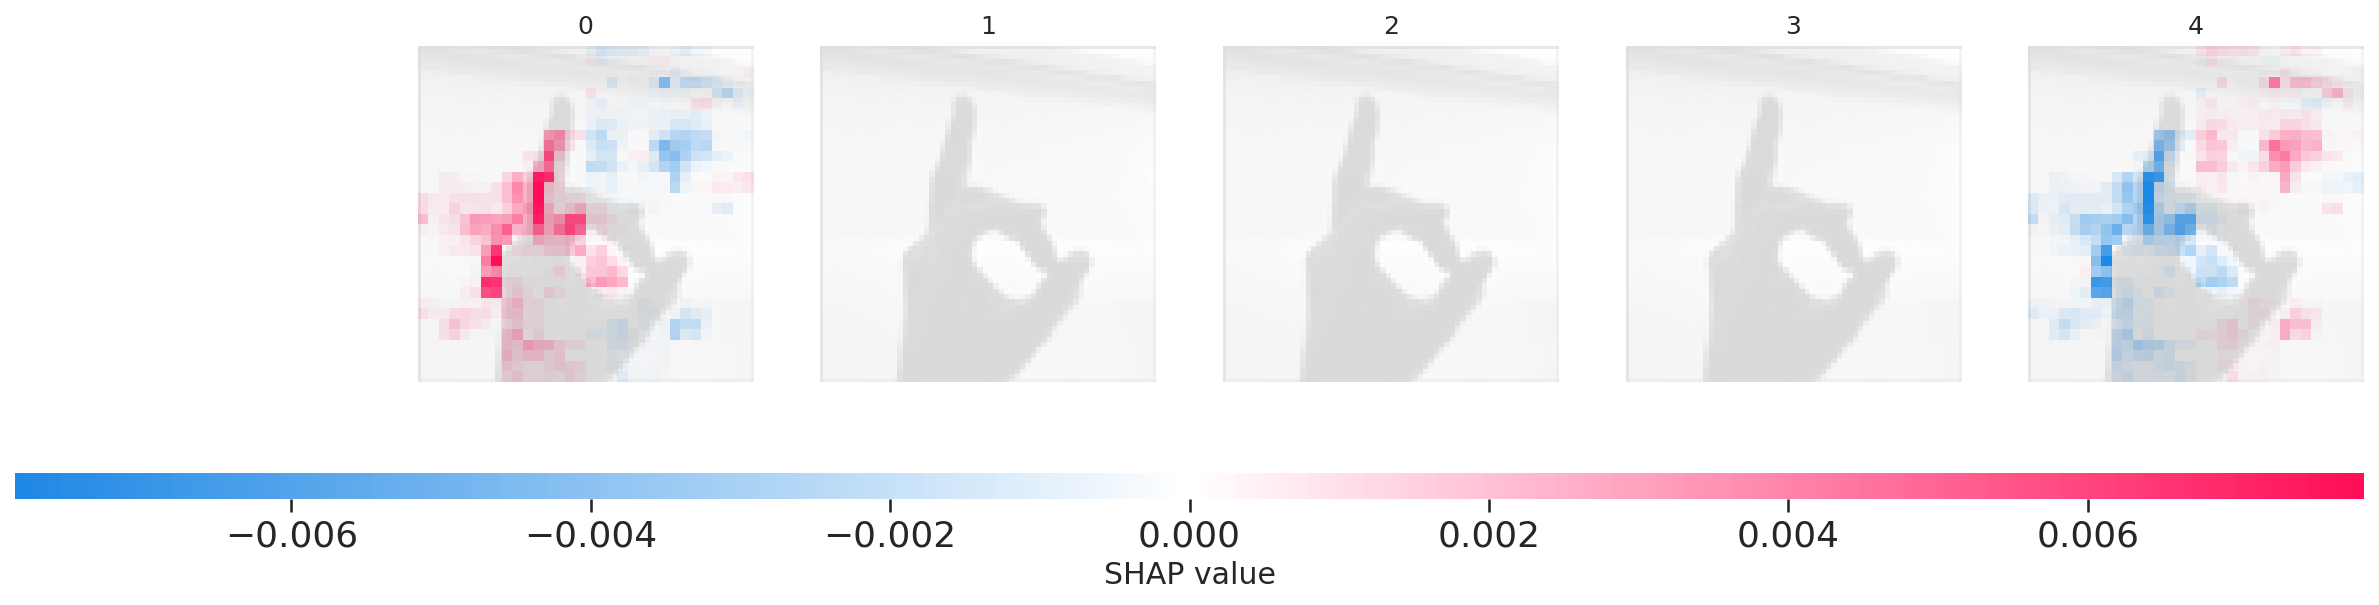

In [ ]:
# Assuming you have a pre-trained model called `model`
def f(x):
    # The model function that simply takes in data and returns model predictions
    tmp = x.copy()  # Create a copy of input to avoid changing the original
    return model(tmp)

# Step 1: Define the masker for image data (with a blur operation)
# This will apply a blur mask with the size 32x32 for the images in x_test
masker_blur = shap.maskers.Image("blur(32,32)", x_test[0].shape)  # Adjust the blur size if needed

# Step 2: Select the first image from x_test for evaluation
ind = [0]  # Use the first image (index 0) from x_test for SHAP computation

# Step 3: Check if the image is in the correct range
x_test_processed = x_test_img[ind]  # Extract the image from the test set


# Step 4: Ensure x_test_processed is in the correct range
# Check if the image values are in integer format (0-255) or float (0.0-1.0)
if x_test_processed.max() <= 255:
    # If it's integer (0-255), clip the values to ensure they're in that range
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If it's float (0.0-1.0), clip the values to ensure they're in that range
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create the SHAP explainer
# The explainer will use the function `f`, masker `masker_blur`, and output classes (assuming there are 5 classes)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(5)))  # Assuming 5 output classes

# Step 6: Calculate SHAP values using the processed image data from x_test
# The explainer will evaluate the SHAP values for the selected image (ind) with a max of 5000 evaluations and a batch size of 50
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)

# Step 7: Visualize the SHAP values for the selected image
# This will generate a plot showing the SHAP values and how they contribute to the model's prediction
shap.image_plot(shap_values_[0], show=True)  # This should display the image and SHAP values